# Matrix Factorization using Bregman Divergenses

## Testing NMF class

In [1]:
from sklearn.decomposition import NMF as nmfsk
from MatrixFactorization import NMF as nmfmy
from MatrixFactorization import myNMF as nmfmycomb

import numpy as np
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

## 1. Gaussian Distribution Graphs

### 1.1 Selecting best way to represent Gaussian Distribution with Non- negative Values

Gaussian Distribution from definition varies from negative infinity to positive infinity. Since NMF requires data with non-negative values this causes problems. To handle this i examine two different approaches for having data with non-negative values that approach a normal distribution.

#### 1.1a Take the absolute value

First i try taking the abolute value of all data from a normal distribution. The results as shown by the graph below where near a normal distribution but at the left of the mean the result was not encouraged.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
rs = RandomState(76321654)
V = rs.normal(4,3.14,10000).reshape(200,50)
V = np.abs(V)
sns.set(color_codes=True)
sns.distplot(V[4])

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [3]:
V.mean()

4.303987512332083

In [4]:
V.std()

2.741339454329155

#### 1.1b Add the absolute of the MIN

The other approach was adding the absolute of the min value. This ensures that all values will be non-negative and also it tries to keep the distribution as it was by shifting the data to the right.

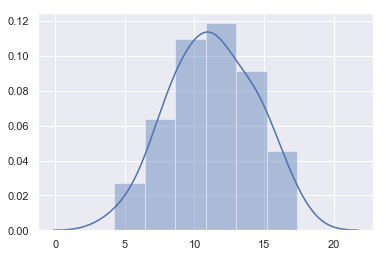

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
rs = RandomState(76321654)
V = rs.normal(5,3.14,10000).reshape(200,50)
V = np.add(V,abs(np.min(V)))
sns.set(color_codes=True)
sns.distplot(V[4])


As can be seen from the above graphs the second way provides better approximation of a normal distribution with non-negative values. Thus the second approach will be used throughout for producing non-negative data resampling normal distribution. 

In [6]:
V.mean()


11.620873774806372

In [7]:
V.std()

3.1572744919693414

In [8]:
def normal_positive_data_add_min(rows, columns, mean, std):
    
    rs = RandomState(76321654)
    V = rs.normal(mean,std,rows * columns).reshape(rows,columns)
    V = np.add(V,abs(np.min(V)))
    return V

In [9]:
def normal_positive_data_abs(rows, columns, mean, std):
    
    rs = RandomState(76321654)
    V = rs.normal(mean,std,rows * columns).reshape(rows,columns)
    V = np.abs(V)

    return V

### 1.2 Test NMF for Data coming from Normal Distribution

In [10]:
V = normal_positive_data_add_min(rows = 2000 , columns = 150, mean=5, std=3.14)
n = 20

#### LOG Likelihood as taken from http://mikkelschmidt.dk/presentations/nmfgppcam.pdf

In [11]:
import math
def neg_log_likelihood_normal(V,W,H):
    st = np.std(V)
    const = V.shape[0] * V.shape[1] * np.log((2*math.pi)**2 *st)
    lpart = np.sum( (V - W.dot(H))**2  / (2* st**2) )
    l = const + lpart
    return l

### Distribution of Resulting matrix

In [12]:
def plot_original_approximatin(V,V_app,mean,std):

    fig_1 = plt.figure(figsize=(16, 10))
    ax_1 = fig_1.add_subplot(111)

    ax_1.set_xlim([min(V.min(),V_app.min()),max(V.max(),V_app.max())])
    ax_1.set_ylim([min(V.min(),V_app.min()),max(V.max(),V_app.max())])

    ax_1.scatter(V,V_app, label="Mine", linewidth=2.5)

    ax_1.plot([V.min(),V.max()],[V.min(),V.max()], color='r', linestyle='-', linewidth=3)

    #ax_1.plot(np.unique(V.flatten()), np.poly1d(np.polyfit(V.flatten(), V_app.flatten(), 1))(np.unique(V.flatten())))


    for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
                 ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(20)
    
    ax_1.legend(loc=0, fontsize = 20)


    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['axes.edgecolor'] = 'black'



    ax_1.set_xlabel('Original Matrix')
    ax_1.set_ylabel('Approximation Matrix')
    fig_1.suptitle('Comparing the original data with the approxiamtion', fontsize = 20)
    fig_1.savefig('GaussianGraphsDiss/OriginalApproximation_mean='+ str("%.3f" % round(mean,3)) + '_std=' + str("%.3f" % round(std,3)) +'.pdf')



In [13]:
mean = 5
std = 3.14

V = normal_positive_data_add_min(rows = 2000 , columns = 150, mean=10, std=3.315)
n = 10
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs,alpha=0,l1_ratio=2, max_iterations =300)
W, H = nmfM.fit_transform(V)
neg_log_likelihood_normal(V,W,H)

1600143.975714396

In [14]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs,alpha=-1, l1_ratio=0, max_iterations =300)
W, H = nmfM.fit_transform(V)
neg_log_likelihood_normal(V,W,H)

1600142.4509227783

In [15]:
rs = RandomState(76321654)
nmfM = nmfmycomb(n_components=n,random_state=rs, max_iter =300)
W = nmfM.fit_transform(V)
H = nmfM.components_
neg_log_likelihood_normal(V,W,H)

1601077.3381661375

In [16]:
rs = RandomState(76321654)
nmfM = nmfmycomb(n_components=n,random_state=rs,init='nndsvd', max_iter =300)
W = nmfM.fit_transform(V)
H = nmfM.components_
neg_log_likelihood_normal(V,W,H)

1601077.3381661375

In [17]:
rs = RandomState(76321654)
nmfM = nmfmycomb(n_components=n,random_state=rs,init='nndsvda', max_iter =300)
W = nmfM.fit_transform(V)
H = nmfM.components_
neg_log_likelihood_normal(V,W,H)

1599671.2090236093

In [18]:
rs = RandomState(76321654)
nmfM = nmfmycomb(n_components=n,random_state=rs,init='nndsvdar', max_iter =300)
W = nmfM.fit_transform(V)
H = nmfM.components_
neg_log_likelihood_normal(V,W,H)

1599056.082938761

In [36]:
mean = 5
std = 1.14

V = normal_positive_data_add_min(rows = 200 , columns = 50, mean=mean, std=std)
n = 2
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs,alpha=0,l1_ratio=2, max_iterations =100)
W, H = nmfM.fit_transform(V)
neg_log_likelihood_normal(V,W,H)

rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs,alpha=0,l1_ratio=2,init='nndsvdar', max_iterations =0)
W1, H1 = nmfM.fit_transform(V)
neg_log_likelihood_normal(V,W,H)

42885.609932046085

Approximation 2 Mean = 5.837  Approximation Std = 0.211


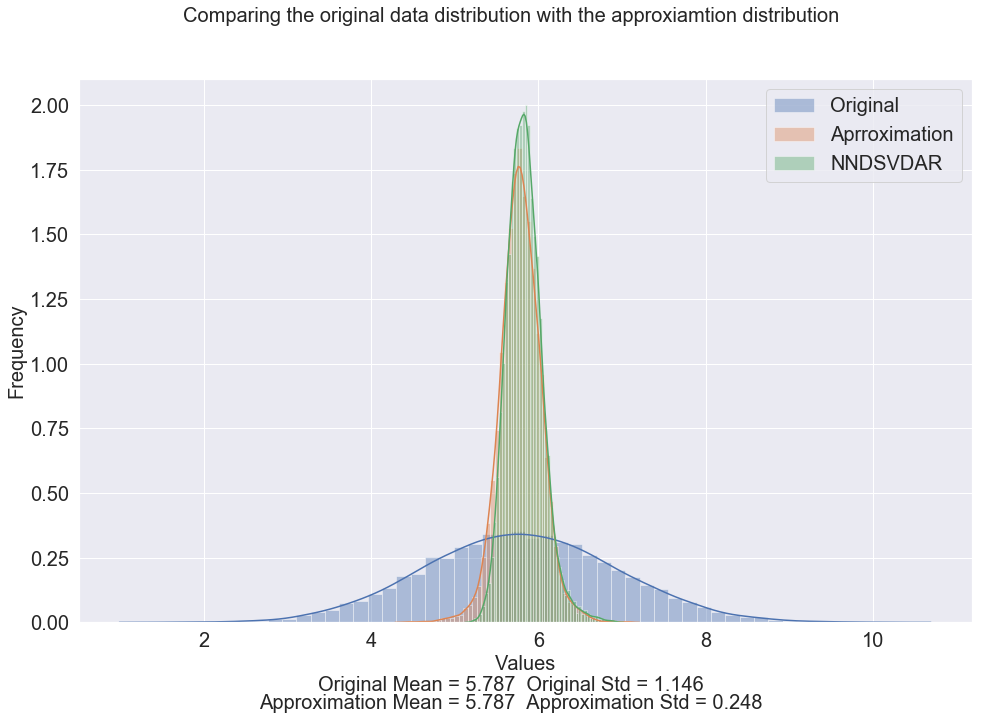

In [45]:

V_app = W.dot(H) 
V1_ = W1.dot(H1)
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
ax_1 = sns.distplot(V.flatten(), label = "Original")

ax_1 = sns.distplot(V_app.flatten() , label = "Aprroximation")

ax_1 = sns.distplot(V1_.flatten(), label = "NNDSVDAR")



ax_1.set_xlabel('Values')
ax_1.set_ylabel('Frequency')
for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
                 ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(20)
ax_1.legend(loc=0, fontsize = 20)
fig_1.suptitle('Comparing the original data distribution with the approxiamtion distribution', fontsize = 20)
fig_1.text(.5, .03, 'Original Mean = ' + str("%.3f" % round(V.mean(),3)) + '  Original Std = ' + str("%.3f" % round(V.std(),3)), ha='center', fontsize=20)
fig_1.text(.5, .005, 'Approximation Mean = ' + str("%.3f" % round(V_app.mean(),3)) + '  Approximation Std = ' + str("%.3f" % round(V_app.std(),3)), ha='center', fontsize=20)
print('Approximation 2 Mean = ' + str("%.3f" % round(V1_.mean(),3)) + '  Approximation Std = ' + str("%.3f" % round(V1_.std(),3)))




Text(0.5, 0.005, 'Approximation Mean = 11.629  Approximation Std = 1.735')

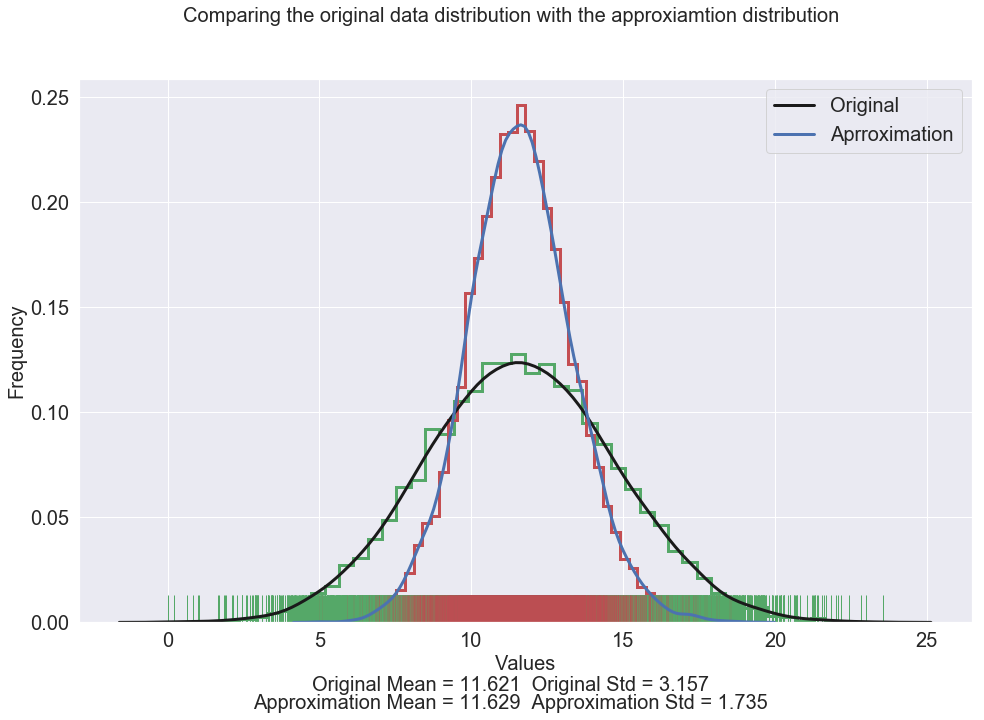

In [15]:
V_app = W.dot(H)
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
ax_1 = sns.distplot(V.flatten(), rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "Original"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

ax_1 = sns.distplot(V_app.flatten(), rug=True, rug_kws={"color": "r", 'alpha':0.1},
                   kde_kws={"color": "b", "lw": 3, "label": "Aprroximation"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "r"})

ax_1.set_xlabel('Values')
ax_1.set_ylabel('Frequency')
for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
                 ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(20)
ax_1.legend(loc=0, fontsize = 20)
fig_1.suptitle('Comparing the original data distribution with the approxiamtion distribution', fontsize = 20)
fig_1.text(.5, .03, 'Original Mean = ' + str("%.3f" % round(V.mean(),3)) + '  Original Std = ' + str("%.3f" % round(V.std(),3)), ha='center', fontsize=20)
fig_1.text(.5, .005, 'Approximation Mean = ' + str("%.3f" % round(V_app.mean(),3)) + '  Approximation Std = ' + str("%.3f" % round(V_app.std(),3)), ha='center', fontsize=20)



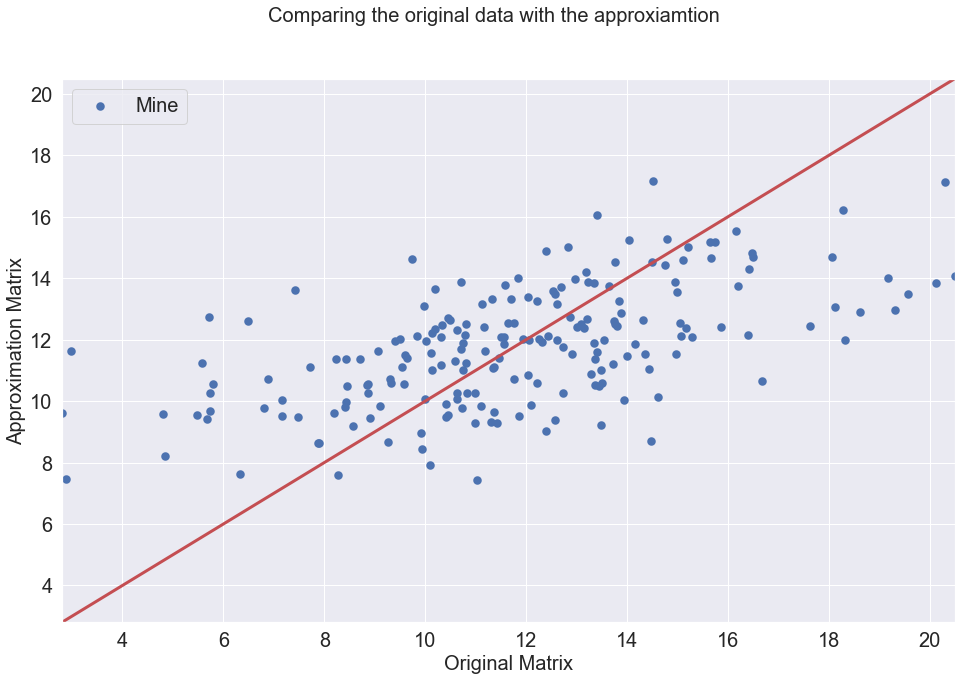

In [16]:
plot_original_approximatin(V[:,40],W.dot(H)[:,40],mean,std)

In [17]:
def plt_ok(V,V_app):
    fig_1 = plt.figure(figsize=(16, 10))
    ax_1 = fig_1.add_subplot(111)

    #ax_1.set_xlim([min(V.min(),V_app.min()),max(V.max(),V_app.max())])
    #ax_1.set_ylim([min(V.min(),V_app.min()),max(V.max(),V_app.max())])

    ax_1.scatter(np.arange(0,50),V.flatten()[0:50], label="Original", linewidth=2.5)
    ax_1.scatter(np.arange(0,50),V_app.flatten()[0:50], label="Approximation", linewidth=2.5)

    #ax_1.plot([V.min(),V.max()],[V.min(),V.max()], color='r', linestyle='-', linewidth=3)

    #ax_1.plot(np.unique(V.flatten()), np.poly1d(np.polyfit(V.flatten(), V_app.flatten(), 1))(np.unique(V.flatten())))


    for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
                 ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(20)
    
    ax_1.legend(loc=0, fontsize = 20)


    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['axes.edgecolor'] = 'black'



    ax_1.set_xlabel('Index')
    ax_1.set_ylabel('Value')
    fig_1.suptitle('Comparing the original data with the approxiamtion', fontsize = 20)
    #fig_1.savefig('GaussianGraphsDiss/OriginalApproximation_mean='+ str("%.3f" % round(mean,3)) + '_std=' + str("%.3f" % round(std,3)) +'.pdf')



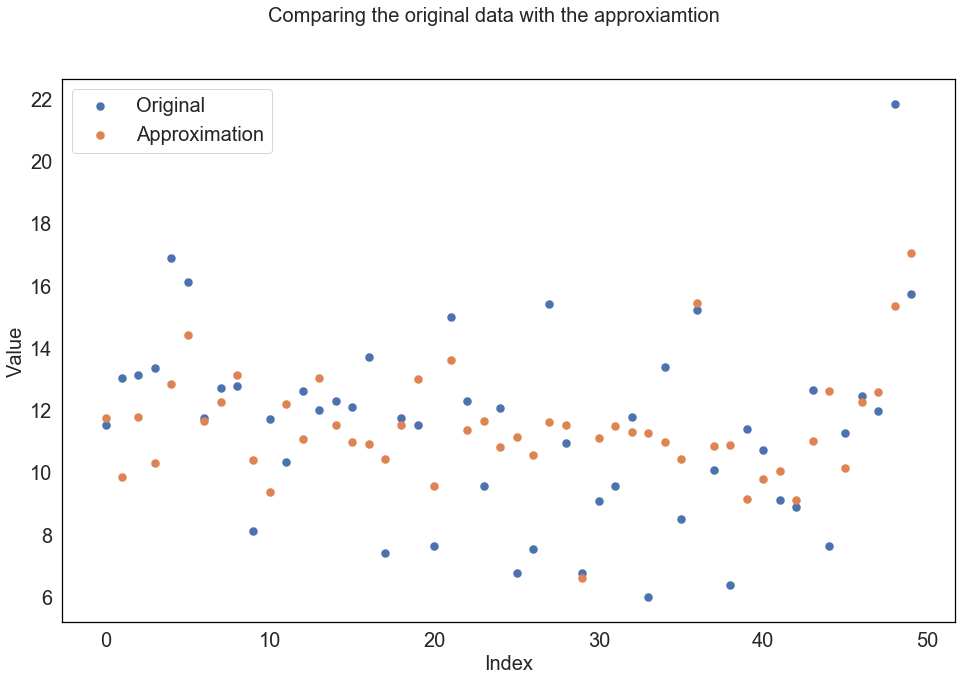

In [18]:
plt_ok(V,W.dot(H))

In [19]:
#plt.scatter(V.flatten(),np.arange(V.min(),V.max()))
import pandas as pd

a = np.zeros((V.shape[0]*V.shape[1],2))
a[:,0] = V.flatten()
a[:,1] = V_app.flatten()
a.shape
df = pd.DataFrame(a,columns=['Original','Approximation'])

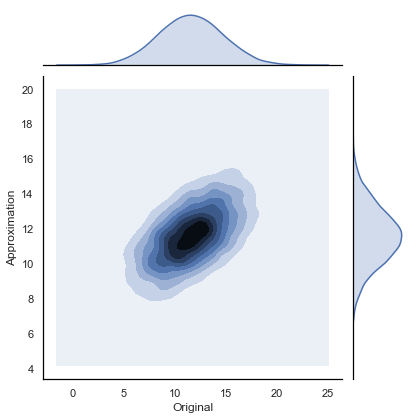

In [20]:
#fig_1 = plt.figure(figsize=(16, 10))
#ax_1 = fig_1.add_subplot(111)


ax_1 = sns.jointplot(x='Original',y='Approximation', data=df, kind="kde")
#for item in ([ax_1.xaxis.label, ax_1.yaxis.label] +
#                 ax_1.get_xticklabels() + ax_1.get_yticklabels()):
#        item.set_fontsize(20)
#ax_1.legend(loc=0, fontsize = 20)
#fig_1.suptitle('Comparing the original data distribution with the approxiamtion distribution', fontsize = 20)
#fig_1.text(.5, .03, 'Original Mean = ' + str("%.3f" % round(V.mean(),3)) + '  Original Std = ' + str("%.3f" % round(V.std(),3)), ha='center', fontsize=20)
#fig_1.text(.5, .005, 'Approximation Mean = ' + str("%.3f" % round(V_app.mean(),3)) + '  Approximation Std = ' + str("%.3f" % round(V_app.std(),3)), ha='center', fontsize=20)




In [21]:
def distance(V,V_app):
    return np.abs(V-V_app)

(10000,)


Text(0.5, 0.03, 'Original Mean = 11.621  Original Std = 3.157')

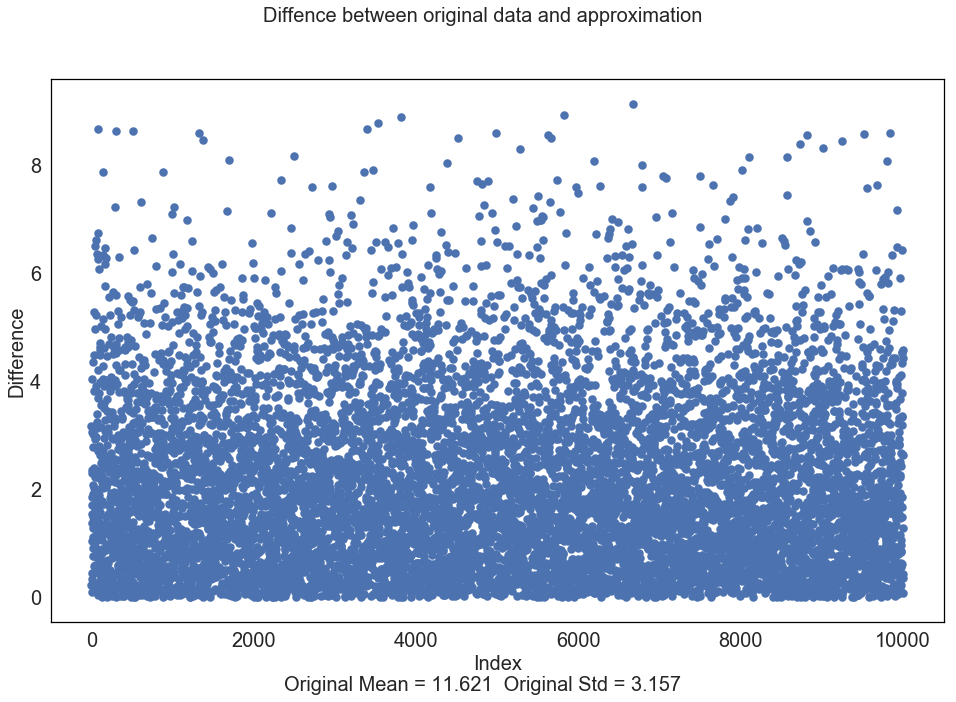

In [22]:
distances = distance(V,V_app).flatten()
print(distances.shape)
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)

#ax_1.set_xlim([min(V.min(),V_app.min()),max(V.max(),V_app.max())])
#ax_1.set_ylim([min(V.min(),V_app.min()),max(V.max(),V_app.max())])

ax_1.scatter(np.arange(0,distances.shape[0]),distances, linewidth=2.5)
#ax_1.scatter(np.arange(0,50),V_app.flatten()[0:50], label="Approximation", linewidth=2.5)

#ax_1.plot([V.min(),V.max()],[V.min(),V.max()], color='r', linestyle='-', linewidth=3)

#ax_1.plot(np.unique(V.flatten()), np.poly1d(np.polyfit(V.flatten(), V_app.flatten(), 1))(np.unique(V.flatten())))


for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
                ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
#ax_1.legend(loc=0, fontsize = 20)


plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'



ax_1.set_xlabel('Index')
ax_1.set_ylabel('Difference')
fig_1.suptitle('Diffence between original data and approximation', fontsize = 20)
fig_1.text(.5, .03, 'Original Mean = ' + str("%.3f" % round(V.mean(),3)) + '  Original Std = ' + str("%.3f" % round(V.std(),3)), ha='center', fontsize=20)


#fig_1.savefig('GaussianGraphsDiss/OriginalApproximation_mean='+ str("%.3f" % round(mean,3)) + '_std=' + str("%.3f" % round(std,3)) +'.pdf')




(10000,)


Text(0.5, 0.03, 'Original Mean = 11.621  Original Std = 3.157')

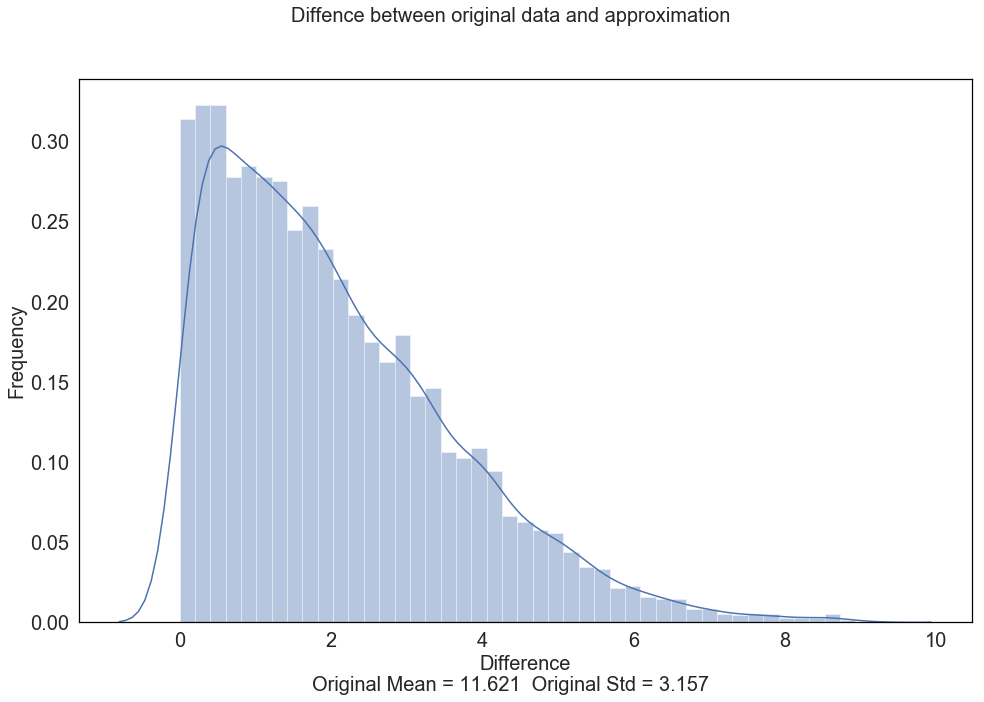

In [23]:
distances = distance(V,V_app).flatten()
print(distances.shape)
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)

#ax_1.set_xlim([min(V.min(),V_app.min()),max(V.max(),V_app.max())])
#ax_1.set_ylim([min(V.min(),V_app.min()),max(V.max(),V_app.max())])

ax_1= sns.distplot(distances)
#ax_1.scatter(np.arange(0,50),V_app.flatten()[0:50], label="Approximation", linewidth=2.5)

#ax_1.plot([V.min(),V.max()],[V.min(),V.max()], color='r', linestyle='-', linewidth=3)

#ax_1.plot(np.unique(V.flatten()), np.poly1d(np.polyfit(V.flatten(), V_app.flatten(), 1))(np.unique(V.flatten())))


for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
                ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
#ax_1.legend(loc=0, fontsize = 20)


plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'



ax_1.set_xlabel('Difference')
ax_1.set_ylabel('Frequency')
fig_1.suptitle('Diffence between original data and approximation', fontsize = 20)
#fig_1.savefig('GaussianGraphsDiss/OriginalApproximation_mean='+ str("%.3f" % round(mean,3)) + '_std=' + str("%.3f" % round(std,3)) +'.pdf')
fig_1.text(.5, .03, 'Original Mean = ' + str("%.3f" % round(V.mean(),3)) + '  Original Std = ' + str("%.3f" % round(V.std(),3)), ha='center', fontsize=20)





(10000,)


Text(0.5, 0.03, 'Original Mean = 11.621  Original Std = 3.157')

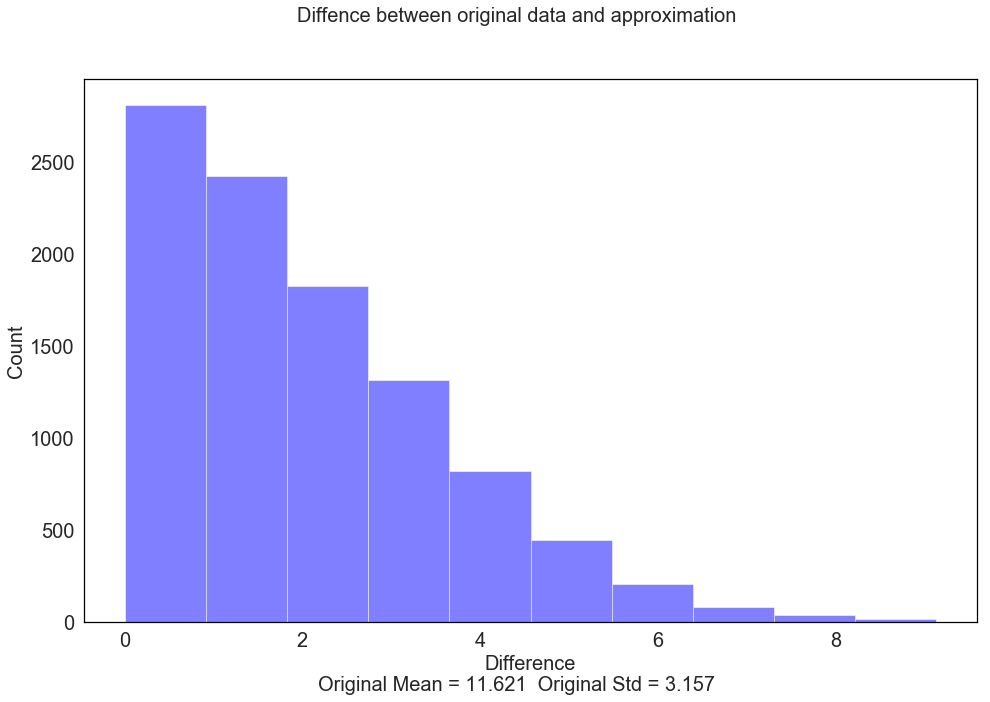

In [24]:
distances = distance(V,V_app).flatten()
print(distances.shape)
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)

#ax_1.set_xlim([min(V.min(),V_app.min()),max(V.max(),V_app.max())])
#ax_1.set_ylim([min(V.min(),V_app.min()),max(V.max(),V_app.max())])

ax_1.hist(distances, facecolor='blue', alpha=0.5)
#ax_1.scatter(np.arange(0,50),V_app.flatten()[0:50], label="Approximation", linewidth=2.5)

#ax_1.plot([V.min(),V.max()],[V.min(),V.max()], color='r', linestyle='-', linewidth=3)

#ax_1.plot(np.unique(V.flatten()), np.poly1d(np.polyfit(V.flatten(), V_app.flatten(), 1))(np.unique(V.flatten())))


for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
                ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
#ax_1.legend(loc=0, fontsize = 20)


plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'



ax_1.set_xlabel('Difference')
ax_1.set_ylabel('Count')
fig_1.suptitle('Diffence between original data and approximation', fontsize = 20)
#fig_1.savefig('GaussianGraphsDiss/OriginalApproximation_mean='+ str("%.3f" % round(mean,3)) + '_std=' + str("%.3f" % round(std,3)) +'.pdf')
fig_1.text(.5, .03, 'Original Mean = ' + str("%.3f" % round(V.mean(),3)) + '  Original Std = ' + str("%.3f" % round(V.std(),3)), ha='center', fontsize=20)





### Compare Initializations

In [25]:
def autoscale_x(ax,margin=0.1):
    """This function rescales the y-axis based on the data that is visible given the current xlim of the axis.
    ax -- a matplotlib axes object
    margin -- the fraction of the total height of the y-data to pad the upper and lower ylims"""

    import numpy as np

    def get_bottom_top(line):
        xd = line.get_xdata()
        yd = line.get_ydata()
        lo,hi = ax.get_xlim()
        x_displayed = xd[((yd>lo) & (yd<hi))]
        h = np.max(x_displayed) - np.min(x_displayed)
        bot = np.min(x_displayed)-margin*h
        top = np.max(x_displayed)+margin*h
        return bot,top

    lines = ax.get_lines()
    bot,top = np.inf, -np.inf

    for line in lines:
        new_bot, new_top = get_bottom_top(line)
        if new_bot < bot: bot = new_bot
        if new_top > top: top = new_top

    ax.set_xlim(bot,top)

In [26]:
def plot_error_graphs(erros_measure,errors,labels,mean,std,title):

   
    
    
    fig_1 = plt.figure(figsize=(16, 16))
    ax_1 = fig_1.add_subplot(111)

    
    for (error,label) in zip(errors,labels):
    
        ax_1.plot(np.arange(1,error.shape[0]+1), 
                  error, label= label, linewidth=3)
        

    for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
                 ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(30)
    
    ax_1.legend(loc=0, fontsize = 30)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['axes.edgecolor'] = 'black'


    #plt.tight_layout()
    ax_1.set_xlabel('N components')
    ax_1.set_ylabel(erros_measure)
    ax_1.set_title(erros_measure +' for Gaussian Distribution with mean = ' + str("%.3f" % round(mean,3))+ ' and std = ' + str("%.3f" % round(std,3)), fontsize = 30)
    fig_1.tight_layout(pad=0)
    fig_1.savefig('GaussianGraphsDiss/Normal' + title + 'mean=' + str("%.3f" % round(mean,3))+ 'std=' + str("%.3f" % round(std,3)) +'.pdf')



In [66]:
def plot_error_graphs_dashed(erros_measure,errors,labels,mean,std,title):

   
    
    
    fig_1 = plt.figure(figsize=(16, 16))
    ax_1 = fig_1.add_subplot(111)

    
    for (error,label) in zip(errors,labels):
    
        ax_1.plot(np.arange(1,error.shape[0]+1), 
                  error, 'D--', markersize=5,label= label, linewidth=3.10)
        

    for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
                 ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(30)
    
    ax_1.legend(loc=0, fontsize = 30)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['axes.edgecolor'] = 'black'


    #plt.tight_layout()
    ax_1.set_xlabel('N components')
    ax_1.set_ylabel(erros_measure)
    ax_1.set_title(erros_measure +' for Gaussian Distribution with mean = ' + str("%.3f" % round(mean,3))+ ' and std = ' + str("%.3f" % round(std,3)), fontsize = 30)
    fig_1.tight_layout(pad=0)
    fig_1.savefig('GaussianGraphsDiss/Normal' + title + 'mean=' + str("%.3f" % round(mean,3))+ 'std=' + str("%.3f" % round(std,3)) +'.pdf')



In [28]:
V = normal_positive_data_add_min(rows = 200 , columns = 50, mean=12, std=3.14)

In [29]:
V = normal_positive_data_add_min(rows = 200 , columns = 50, mean=12, std=3.14)
mab_mine = np.zeros(50)
mab_comb = np.zeros(50)
msq_mine = np.zeros(50)
msq_comb = np.zeros(50)
anl_mine = np.zeros(50)
anl_comb = np.zeros(50)



for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
    
    
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs)
    W, H = nmfM.fit_transform(V)
    V_mine_app = W.dot(H)
    
    #Combination
    rs = RandomState(76321654)
    nmfcomb = nmfmycomb(n_components=n,random_state=rs)
    Wcomb = nmfcomb.fit_transform(V)
    Hcomb = nmfcomb.components_
    V_comb_app = Wcomb.dot(Hcomb)

 
    
    # Mean Absolute Value
    mab_mine[n-1] = mean_absolute_error(V,V_mine_app)
    mab_comb[n-1] = mean_absolute_error(V,V_comb_app)
    
    # Mean Squared Errors 
    msq_mine[n-1] = mean_squared_error(V, V_mine_app)
    msq_comb[n-1] = mean_squared_error(V, V_comb_app)


    # Average Neg Log Likelihoods
  
    diffM = neg_log_likelihood_normal(V, W, H)
    anl_mine[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffM2 =neg_log_likelihood_normal(V, Wcomb, Hcomb )
    anl_comb[n-1] = diffM2 / (V.shape[0] * V.shape[1])



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


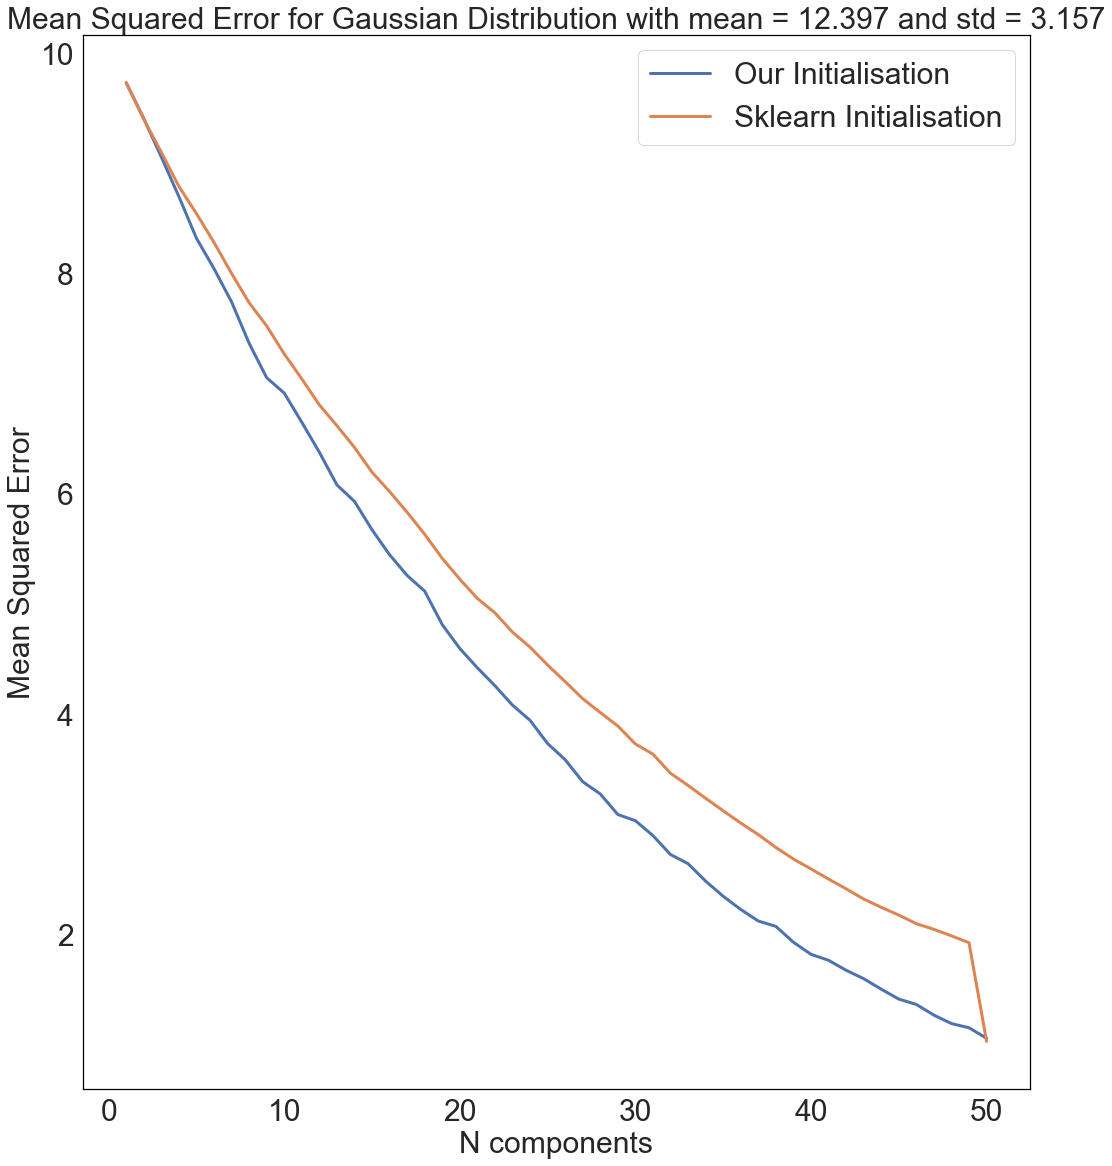

In [30]:
# Plot Mean Square Errors
plot_error_graphs('Mean Squared Error',  [msq_mine,msq_comb],['Our Initialisation','Sklearn Initialisation'],V.mean(),V.std(),'MeanSquareErrorsCombvsMine')

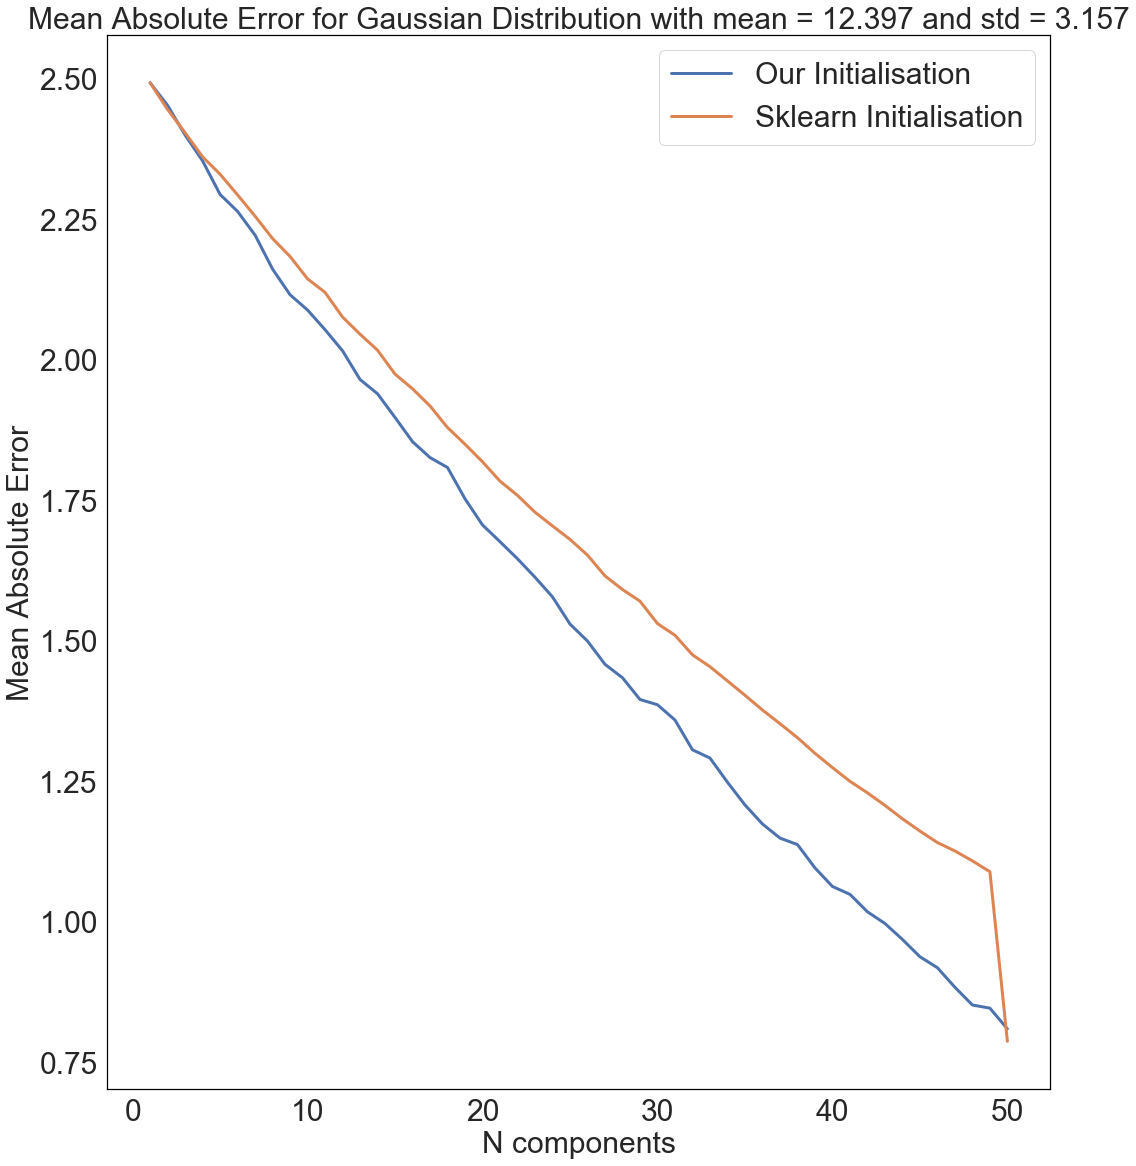

In [31]:
# Plot Mean Absolute Value
plot_error_graphs('Mean Absolute Error',[mab_mine,mab_comb],['Our Initialisation','Sklearn Initialisation'],V.mean(),V.std(),'MeanAbsoluteValueCombvsMine')

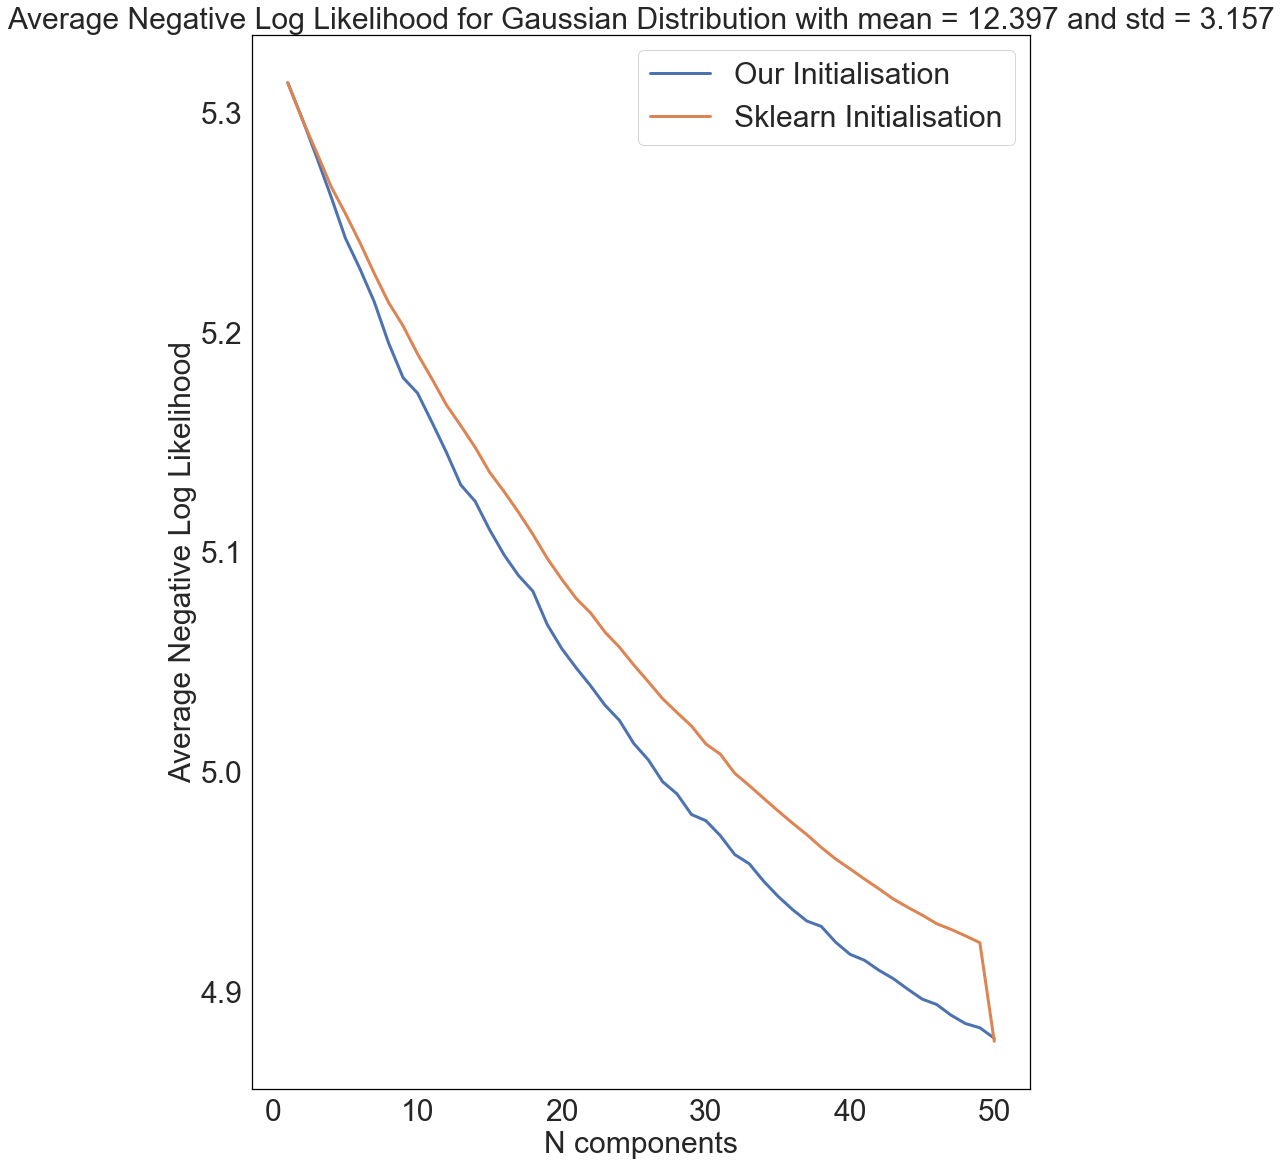

In [32]:
# Plot Average Negative Log Likelihood Absolute Value
plot_error_graphs('Average Negative Log Likelihood',[anl_mine,anl_comb],['Our Initialisation','Sklearn Initialisation'],V.mean(),V.std(),'MeanAbsoluteValueCombvsMine')

### Compare Approaches same Standar Deviation

In [33]:
def plot_error_graphs_norm(erros_measure,errors,labels,mean,std,title,change_title=None):

   
    
    errors = normalize(errors, norm='max', axis=0, copy=True, return_norm=False)

    fig_1 = plt.figure(figsize=(16, 10))
    ax_1 = fig_1.add_subplot(111)

    #min_ = np.min(errors)
    #max_ = np.max(errors)
    #print(min_)
    #print(max_)
    #ax_1.set_autoscaley_on(False)
    
    for (error,label) in zip(errors,labels):
    
        ax_1.plot(np.arange(1,error.shape[0]+1), error,
                   label= label, linewidth=3)
        

    for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
                 ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(30)
    
    ax_1.legend(loc=0, fontsize = 30)
    #ax_1.set_yscale('logit')
    #autoscale_x(ax_1)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['axes.edgecolor'] = 'black'
    #scale.register_scale(scale.InvertedLogTransformBase(shorthand_name='ilt'))
    #plt.gca().set_xscale('log', basey=1.5)
    #plt.yticks([0.02,0.03,0.04,0.05,0.1],['0.02','0.03','0.04','0.05','0.1'])
    #plt.xticks([0,10,50])
    #xbounds = ax_1.get_xlim()
    #et(gca, 'xtick', xbounds(1):0.1:xbounds(2))
    #plt.xlim([1, 50])
    #plt.xticks(np.logspace(start=0,stop=5, num=5,base=2))
    #plt.tight_layout()
    ax_1.set_xlabel('N components')
    ax_1.set_ylabel(erros_measure)
    ax_1.set_title(erros_measure +'Gaussian Distribution mean = ' + str("%.3f" % round(mean,3))+ ' and std = ' + str("%.3f" % round(std,3)), fontsize = 30)
    fig_1.tight_layout(pad=0)
    if change_title :
        fig_1.savefig('GaussianGraphsDiss/' + change_title +'.pdf')
    else:
        fig_1.savefig('GaussianGraphsDiss/Normal' + title + 'mean=' + str("%.3f" % round(mean,3))+ 'std=' + str("%.3f" % round(std,3)) +'.pdf')



In [ ]:
V = normal_positive_data_add_min(rows = 2000 , columns = 50, mean=1, std=0.315)

mab_gauss = np.zeros(50)
mab_pois = np.zeros(50)
mab_gamma = np.zeros(50)
msq_gauss = np.zeros(50)
msq_pois = np.zeros(50)
msq_gamma = np.zeros(50)
anl_gauss = np.zeros(50)
anl_pois = np.zeros(50)
anl_gamma = np.zeros(50)


for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
        
    #My Gaussian
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gaussian',max_iterations=10000)
    Wgauss, Hgauss = nmfM.fit_transform(V)
    V_gauss_app = Wgauss.dot(Hgauss)
    
    #My Poisson
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='poisson',max_iterations=10000)
    Wpois, Hpois = nmfM.fit_transform(V)
    V_pois_app = Wpois.dot(Hpois)
    
    #My Gamma
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gamma', phi_update=True,max_iterations=10000)
    Wgamma, Hgamma = nmfM.fit_transform(V)
    V_gamma_app = Wgamma.dot(Hgamma)

 
    
    # Mean Absolute Value
    mab_gauss[n-1] = mean_absolute_error(V,V_gauss_app)
    mab_pois[n-1] = mean_absolute_error(V,V_pois_app)
    mab_gamma[n-1] = mean_absolute_error(V,V_gamma_app)


    
    # Mean Squared Errors 
    msq_gauss[n-1] = mean_squared_error(V,V_gauss_app)
    msq_pois[n-1] = mean_squared_error(V,V_pois_app)
    msq_gamma[n-1] = mean_squared_error(V,V_gamma_app)



    # Average Neg Log Likelihoods
  
    diffM = neg_log_likelihood_normal(V, Wgauss, Hgauss)
    anl_gauss[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffM2 =neg_log_likelihood_normal(V, Wpois, Hpois )
    anl_pois[n-1] = diffM2 / (V.shape[0] * V.shape[1])

    diffM3 =neg_log_likelihood_normal(V, Wgamma, Hgamma )
    anl_gamma[n-1] = diffM3 / (V.shape[0] * V.shape[1])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [53]:
import numpy as np
from numpy import ma

from matplotlib import cbook, docstring, rcParams
from matplotlib.ticker import (
    NullFormatter, ScalarFormatter, LogFormatterSciNotation, LogitFormatter,
    NullLocator, LogLocator, AutoLocator, AutoMinorLocator,
    SymmetricalLogLocator, LogitLocator)
from matplotlib.transforms import Transform, IdentityTransform
from matplotlib.scale import ScaleBase
from matplotlib.scale import SymmetricalLogTransform

class InvertedSymmetricalLogTransform(Transform):
    input_dims = 1
    output_dims = 1
    is_separable = True
    has_inverse = True

    def __init__(self, base, linthresh, linscale):
        Transform.__init__(self)
        symlog = SymmetricalLogTransform(base, linthresh, linscale)
        self.base = 2
        self.linthresh = linthresh
        self.invlinthresh = symlog.transform(linthresh)
        self.linscale = linscale
        self._linscale_adj = (linscale / (1.0 - self.base ** -1))

    def transform_non_affine(self, a):
        sign = np.sign(a)
        masked = ma.masked_inside(a, -self.invlinthresh,
                                  self.invlinthresh, copy=False)
        exp = sign * self.linthresh * (
            ma.power(self.base, (sign * (masked / self.linthresh))
            - self._linscale_adj))
        if masked.mask.any():
            return ma.where(masked.mask, a / self._linscale_adj, exp)
        else:
            return exp


    def inverted(self):
        return SymmetricalLogTransform(self.base,
                                       self.linthresh, self.linscale)
    
class InvertedSymmetricalLogScale(ScaleBase):
    """
    The symmetrical logarithmic scale is logarithmic in both the
    positive and negative directions from the origin.

    Since the values close to zero tend toward infinity, there is a
    need to have a range around zero that is linear.  The parameter
    *linthresh* allows the user to specify the size of this range
    (-*linthresh*, *linthresh*).
    """
    name = 'inv_symlog'
    # compatibility shim
    #SymmetricalLogTransform = SymmetricalLogTransform
    InvertedSymmetricalLogTransform = InvertedSymmetricalLogTransform

    def __init__(self, axis, **kwargs):
        """
        *basex*/*basey*:
           The base of the logarithm

        *linthreshx*/*linthreshy*:
          A single float which defines the range (-*x*, *x*), within
          which the plot is linear. This avoids having the plot go to
          infinity around zero.

        *subsx*/*subsy*:
           Where to place the subticks between each major tick.
           Should be a sequence of integers.  For example, in a log10
           scale: ``[2, 3, 4, 5, 6, 7, 8, 9]``

           will place 8 logarithmically spaced minor ticks between
           each major tick.

        *linscalex*/*linscaley*:
           This allows the linear range (-*linthresh* to *linthresh*)
           to be stretched relative to the logarithmic range.  Its
           value is the number of decades to use for each half of the
           linear range.  For example, when *linscale* == 1.0 (the
           default), the space used for the positive and negative
           halves of the linear range will be equal to one decade in
           the logarithmic range.
        """
        if axis.axis_name == 'x':
            base = kwargs.pop('basex', 10.0)
            linthresh = kwargs.pop('linthreshx', 2.0)
            subs = kwargs.pop('subsx', None)
            linscale = kwargs.pop('linscalex', 1.0)
        else:
            base = kwargs.pop('basey', 10.0)
            linthresh = kwargs.pop('linthreshy', 2.0)
            subs = kwargs.pop('subsy', None)
            linscale = kwargs.pop('linscaley', 1.0)

        if base <= 1.0:
            raise ValueError("'basex/basey' must be larger than 1")
        if linthresh <= 0.0:
            raise ValueError("'linthreshx/linthreshy' must be positive")
        if linscale <= 0.0:
            raise ValueError("'linscalex/linthreshy' must be positive")

        self._transform = self.InvertedSymmetricalLogTransform(base,
                                                       linthresh,
                                                       linscale)

        self.base = 2
        self.linthresh = linthresh
        self.linscale = linscale
        self.subs = subs

    def set_default_locators_and_formatters(self, axis):
        """
        Set the locators and formatters to specialized versions for
        symmetrical log scaling.
        """
        axis.set_major_locator(SymmetricalLogLocator(self.get_transform()))
        axis.set_major_formatter(LogFormatterSciNotation(self.base))
        axis.set_minor_locator(SymmetricalLogLocator(self.get_transform(),
                                                     self.subs))
        axis.set_minor_formatter(NullFormatter())


    def get_transform(self):
        """
        Return a :class:`SymmetricalLogTransform` instance.
        """
        return self._transform

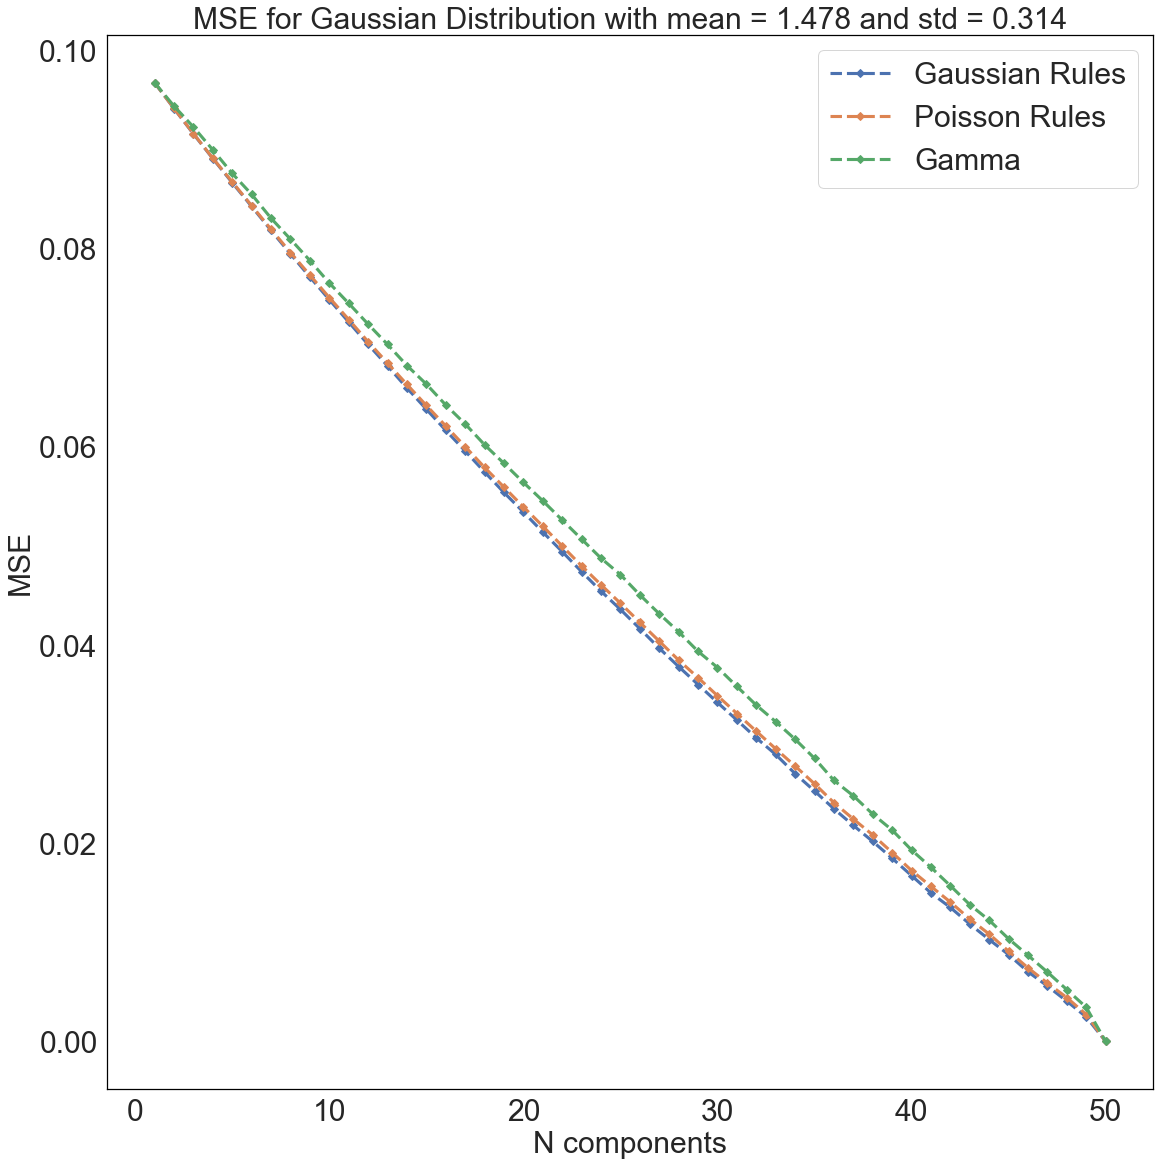

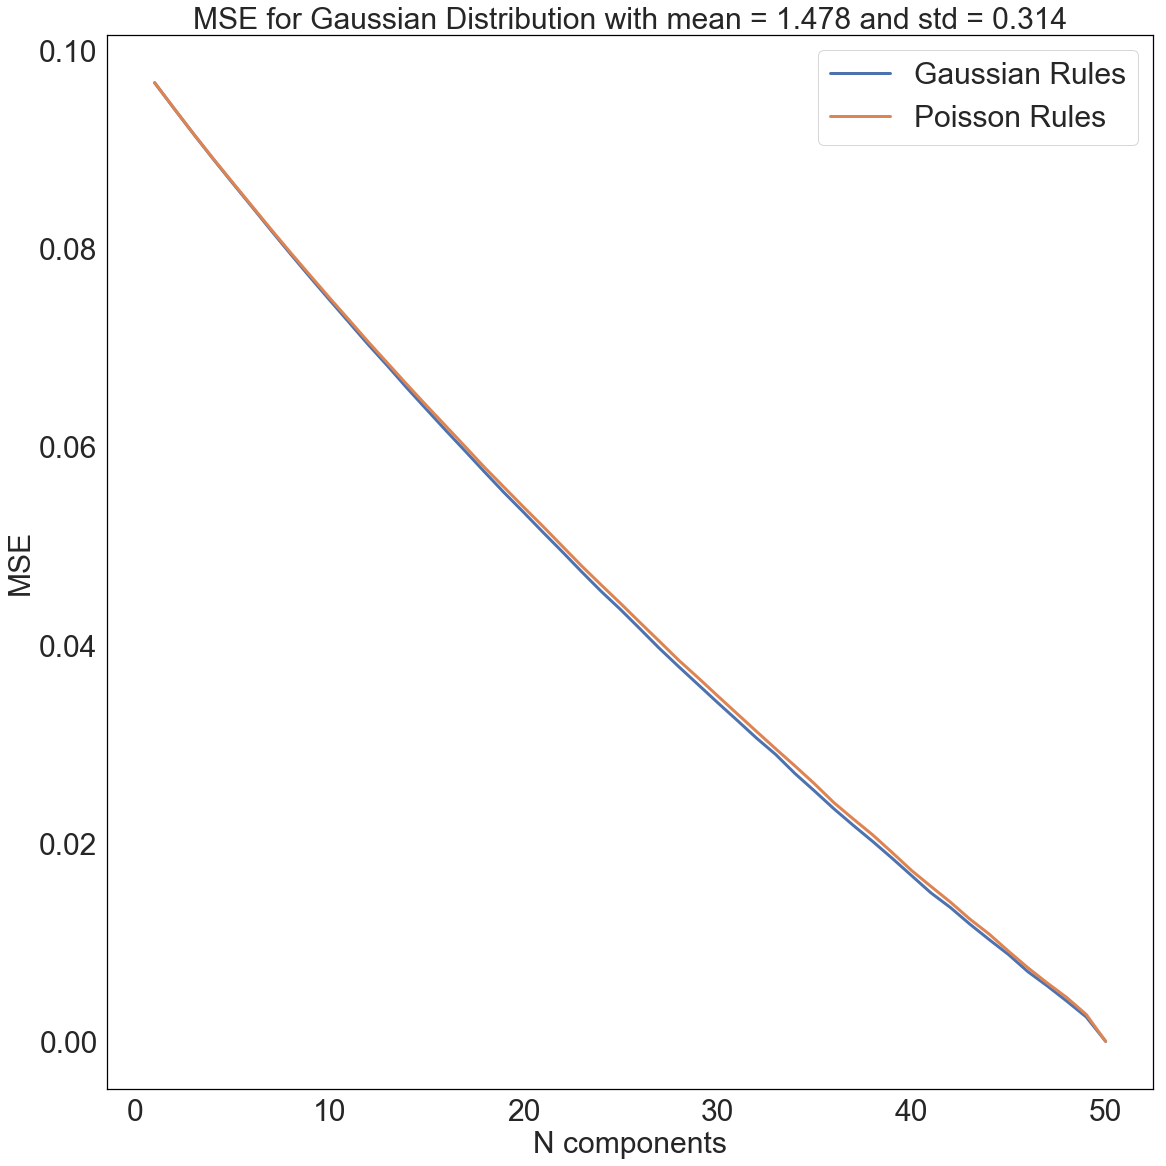

In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
#scale.register_scale(InvertedSymmetricalLogScale)
from sklearn.preprocessing import scale, MinMaxScaler

A = np.vstack([msq_gauss, msq_pois,msq_gamma])

#A = MinMaxScaler(A,axis=1,with_mean=True, with_std=False, copy=True)

#A[0] = np.divide(A[0],msq_gauss)
#A[1] = np.divide(A[1],msq_gauss)
#A[2] = np.divide(A[2],msq_gauss)
#max_ = A.max(axis=1)
#min_ = A.min(axis=1)
#print(max_)
#print(min_)
#A[0] = A[0] * min_[0] / max_[0]
#A[1] = A[1] * min_[1] / max_[1]
#A[2] = A[2] * min_[1] / max_[2]
#A = (A - mean) / std
#A = (A -min_) / (max_-min_)
#A = (A - min_) / (max_- min_)
#A = A/A.sum(axis=0,keepdims=1)
#A  = A / np.max(msq_gauss)
# Plot Mean Square Errors
#plot_error_graphs('Mean Squared Error',  [A[0],A[1],A[2]],['Gaussian Rules','Poisson Rules','Gamma'],V.mean(),V.std(),'SameSTDMeanSquareErrorsGaussianPoisGamma')
plot_error_graphs_dashed('MSE',  [msq_gauss,msq_pois,msq_gamma],['Gaussian Rules','Poisson Rules','Gamma'],V.mean(),V.std(),'MSQtestSmoothness1000iter2000columns')
plot_error_graphs('MSE',  [msq_gauss,msq_pois],['Gaussian Rules','Poisson Rules'],V.mean(),V.std(),'MSQtestSmoothness1000iter2000columns')

In [40]:
# Plot Mean Square Errors
plot_error_graphs_norm('Mean Squared Error',  [msq_gauss,msq_pois, msq_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'SameSTDMeanSquareErrorsGaussianPoisGamma')

NameError: name 'plot_error_graphs_norm' is not defined

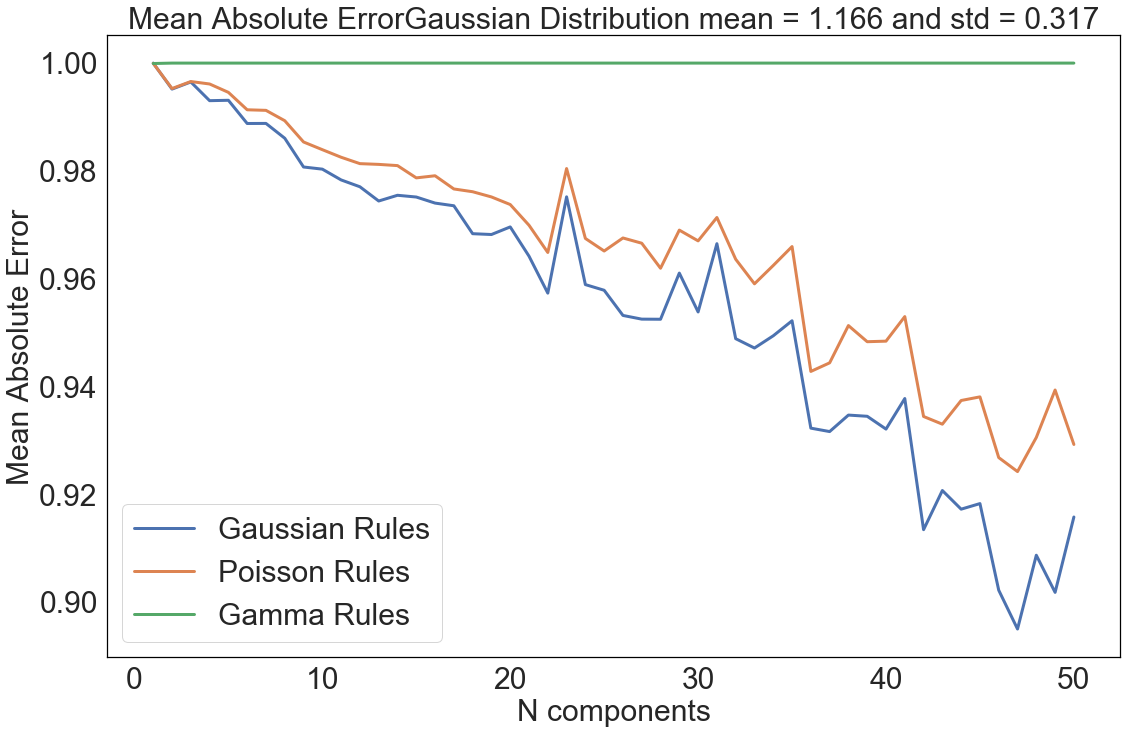

In [422]:
# Plot Mean Absolute Errors
plot_error_graphs('Mean Absolute Error',  [mab_gauss,mab_pois, mab_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'SameStdMeanAbsoluteErrorsGaussianPoisGamma')

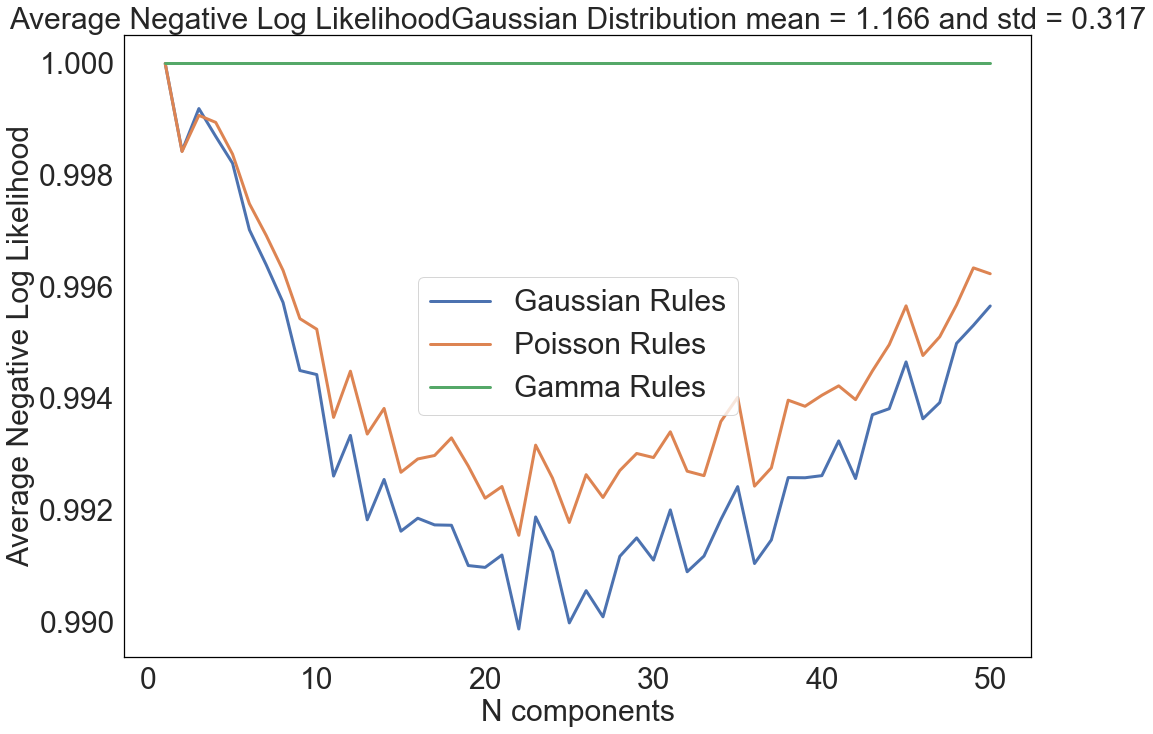

In [425]:
# Plot Negative Log Likelihood
plot_error_graphs('Average Negative Log Likelihood',  [anl_gauss, anl_pois, anl_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'SameSTDAvgLogLikelihoodGaussianPoisGamma','NormalizeLogLikelohhod')

In [426]:
V = normal_positive_data_add_min(rows = 200 , columns = 50, mean=2, std=0.415)
mab_gauss = np.zeros(50)
mab_pois = np.zeros(50)
mab_gamma = np.zeros(50)
msq_gauss = np.zeros(50)
msq_pois = np.zeros(50)
msq_gamma = np.zeros(50)
anl_gauss = np.zeros(50)
anl_pois = np.zeros(50)
anl_gamma = np.zeros(50)


for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
        
    #My Gaussian
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gaussian', phi_update=True)
    Wgauss, Hgauss = nmfM.fit_transform(V)
    V_gauss_app = Wgauss.dot(Hgauss)
    
    #My Poisson
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='poisson', phi_update=True)
    Wpois, Hpois = nmfM.fit_transform(V)
    V_pois_app = Wpois.dot(Hpois)
    
    #My Gamma
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gamma', phi_update=True)
    Wgamma, Hgamma = nmfM.fit_transform(V)
    V_gamma_app = Wgamma.dot(Hgamma)

 
    
    # Mean Absolute Value
    mab_gauss[n-1] = mean_absolute_error(V,V_gauss_app)
    mab_pois[n-1] = mean_absolute_error(V,V_pois_app)
    mab_gamma[n-1] = mean_absolute_error(V,V_gamma_app)


    
    # Mean Squared Errors 
    msq_gauss[n-1] = mean_squared_error(V,V_gauss_app)
    msq_pois[n-1] = mean_squared_error(V,V_pois_app)
    msq_gamma[n-1] = mean_squared_error(V,V_gamma_app)



    # Average Neg Log Likelihoods
  
    diffM = neg_log_likelihood_normal(V, Wgauss, Hgauss)
    anl_gauss[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffM2 =neg_log_likelihood_normal(V, Wpois, Hpois )
    anl_pois[n-1] = diffM2 / (V.shape[0] * V.shape[1])

    diffM3 =neg_log_likelihood_normal(V, Wgamma, Hgamma )
    anl_gamma[n-1] = diffM3 / (V.shape[0] * V.shape[1])



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


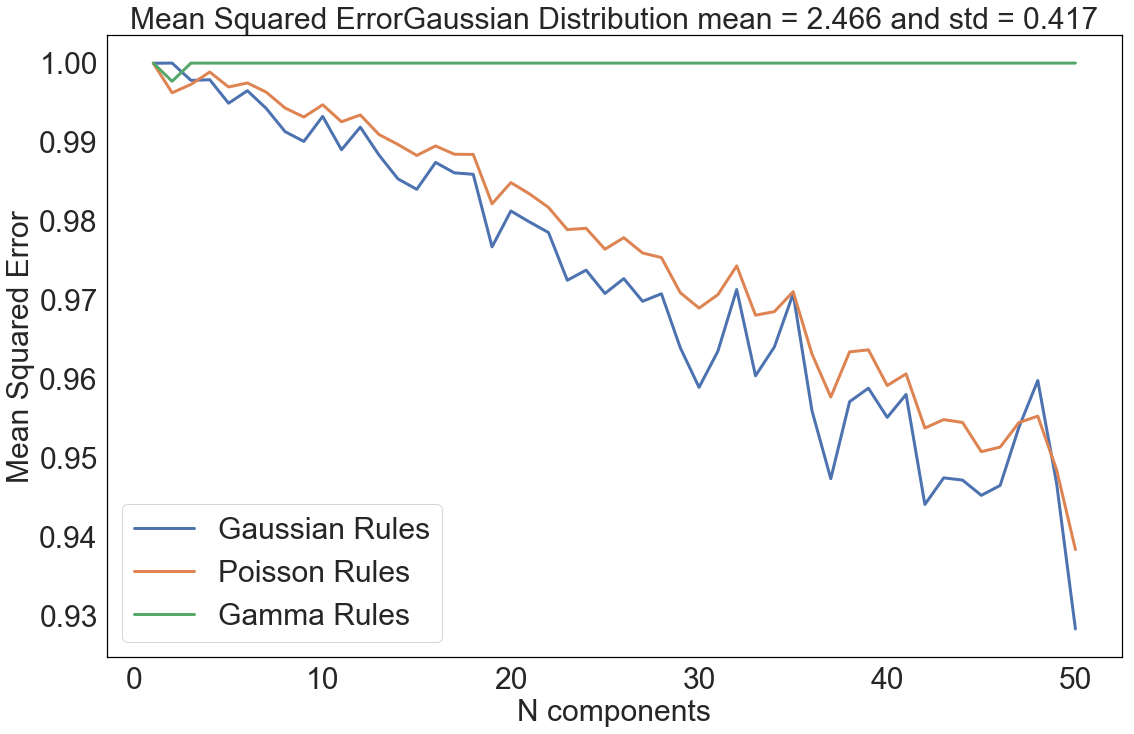

In [427]:
# Plot Mean Square Errors
plot_error_graphs('Mean Squared Error',  [msq_gauss,msq_pois, msq_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'SameSTDMeanSquareErrorsGaussianPoisGamma')

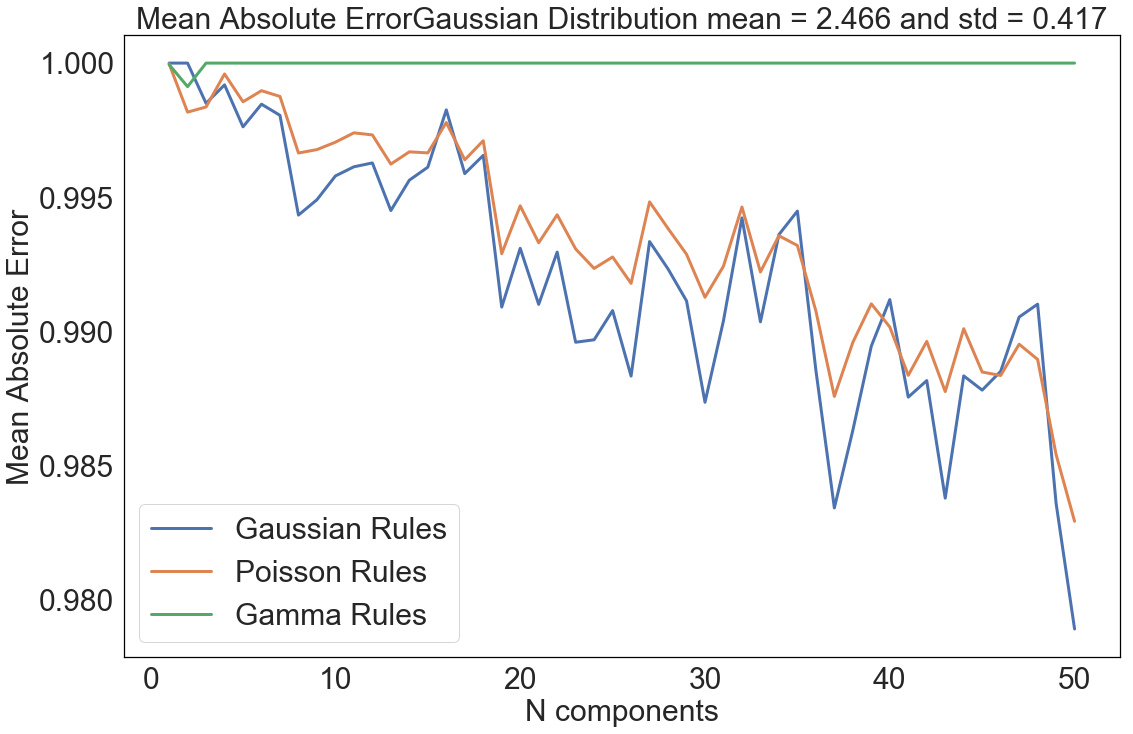

In [428]:
# Plot Mean Absolute Errors
plot_error_graphs('Mean Absolute Error',  [mab_gauss,mab_pois, mab_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'STDMeanAbsoluteErrorsGaussianPoisGamma')

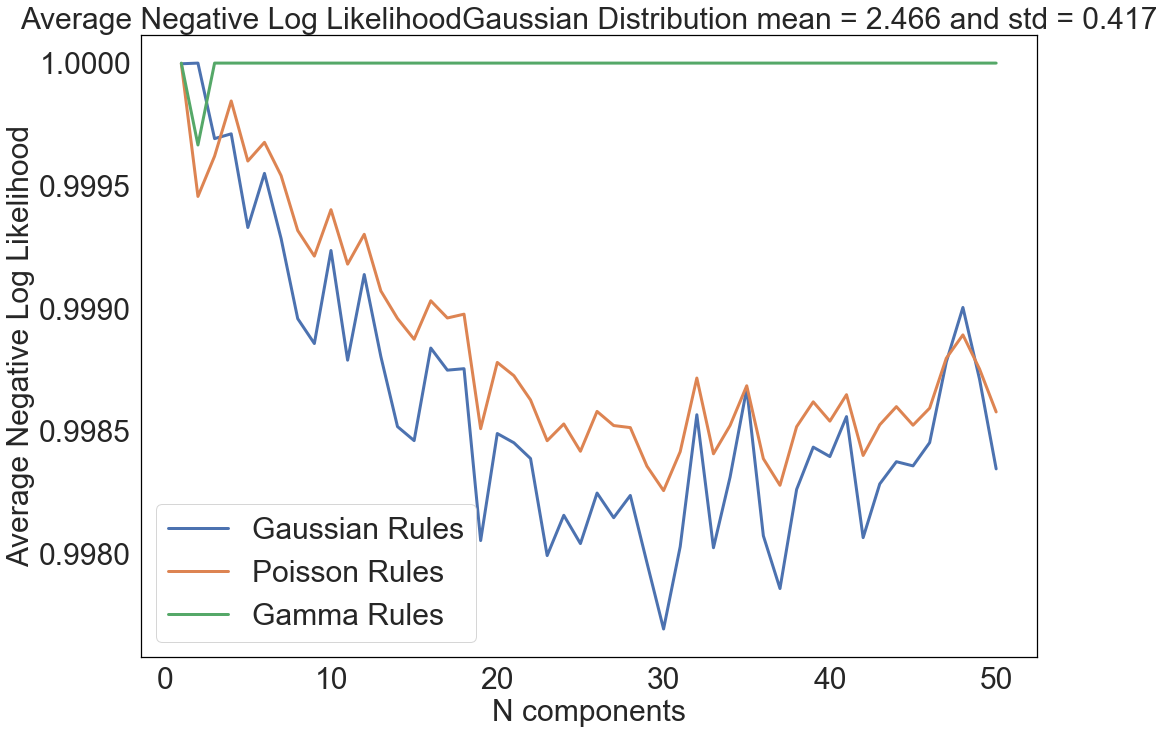

In [429]:
# Plot Negative Log Likelihood
plot_error_graphs('Average Negative Log Likelihood',  [anl_gauss, anl_pois, anl_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'STDAvgLogLikelihoodGaussianPoisGamma')

In [430]:
V = normal_positive_data_add_min(rows = 200 , columns = 50, mean=25, std= math.pi)
mab_gauss = np.zeros(50)
mab_pois = np.zeros(50)
mab_gamma = np.zeros(50)
msq_gauss = np.zeros(50)
msq_pois = np.zeros(50)
msq_gamma = np.zeros(50)
anl_gauss = np.zeros(50)
anl_pois = np.zeros(50)
anl_gamma = np.zeros(50)


for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
        
    #My Gaussian
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gaussian', phi_update=True)
    Wgauss, Hgauss = nmfM.fit_transform(V)
    V_gauss_app = Wgauss.dot(Hgauss)
    
    #My Poisson
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='poisson', phi_update=True)
    Wpois, Hpois = nmfM.fit_transform(V)
    V_pois_app = Wpois.dot(Hpois)
    
    #My Gamma
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gamma', phi_update=True)
    Wgamma, Hgamma = nmfM.fit_transform(V)
    V_gamma_app = Wgamma.dot(Hgamma)

 
    
    # Mean Absolute Value
    mab_gauss[n-1] = mean_absolute_error(V,V_gauss_app)
    mab_pois[n-1] = mean_absolute_error(V,V_pois_app)
    mab_gamma[n-1] = mean_absolute_error(V,V_gamma_app)


    
    # Mean Squared Errors 
    msq_gauss[n-1] = mean_squared_error(V,V_gauss_app)
    msq_pois[n-1] = mean_squared_error(V,V_pois_app)
    msq_gamma[n-1] = mean_squared_error(V,V_gamma_app)



    # Average Neg Log Likelihoods
  
    diffM = neg_log_likelihood_normal(V, Wgauss, Hgauss)
    anl_gauss[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffM2 =neg_log_likelihood_normal(V, Wpois, Hpois )
    anl_pois[n-1] = diffM2 / (V.shape[0] * V.shape[1])

    diffM3 =neg_log_likelihood_normal(V, Wgamma, Hgamma )
    anl_gamma[n-1] = diffM3 / (V.shape[0] * V.shape[1])




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


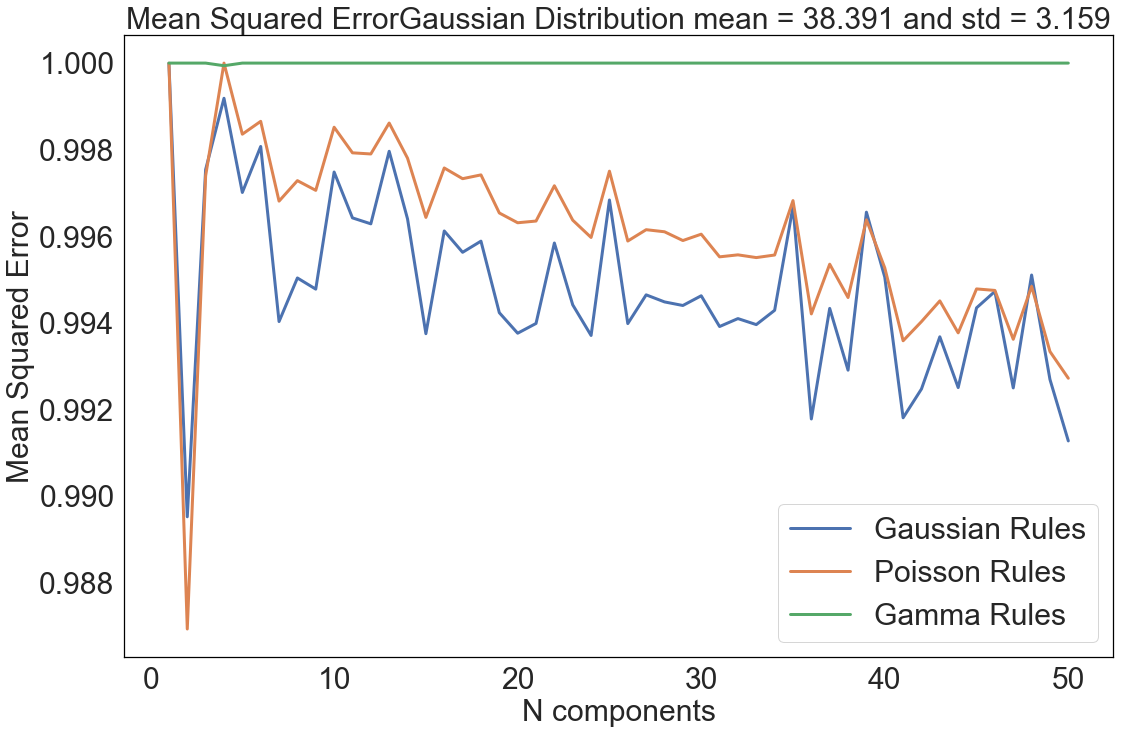

In [431]:
# Plot Mean Square Errors
plot_error_graphs('Mean Squared Error',  [msq_gauss,msq_pois, msq_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'STDMeanSquareErrorsGaussianPoisGamma')

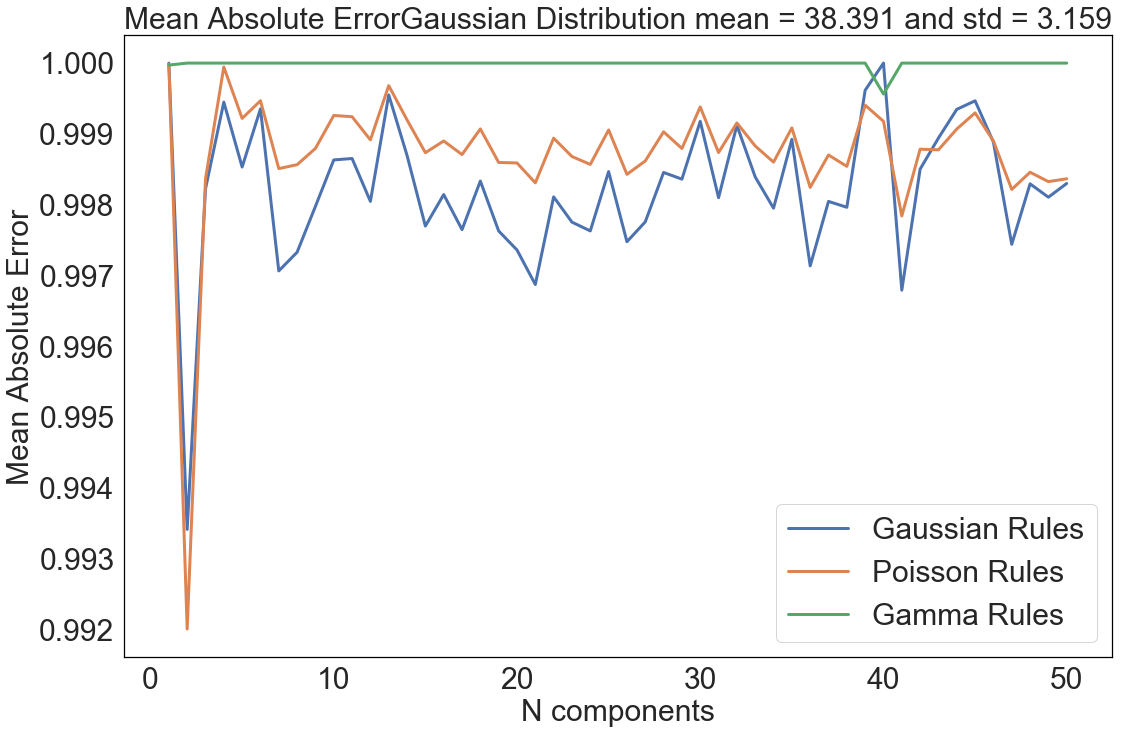

In [432]:
# Plot Mean Absolute Errors
plot_error_graphs('Mean Absolute Error',  [mab_gauss,mab_pois, mab_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'MeanAbsoluteErrorsGaussianPoisGamma')

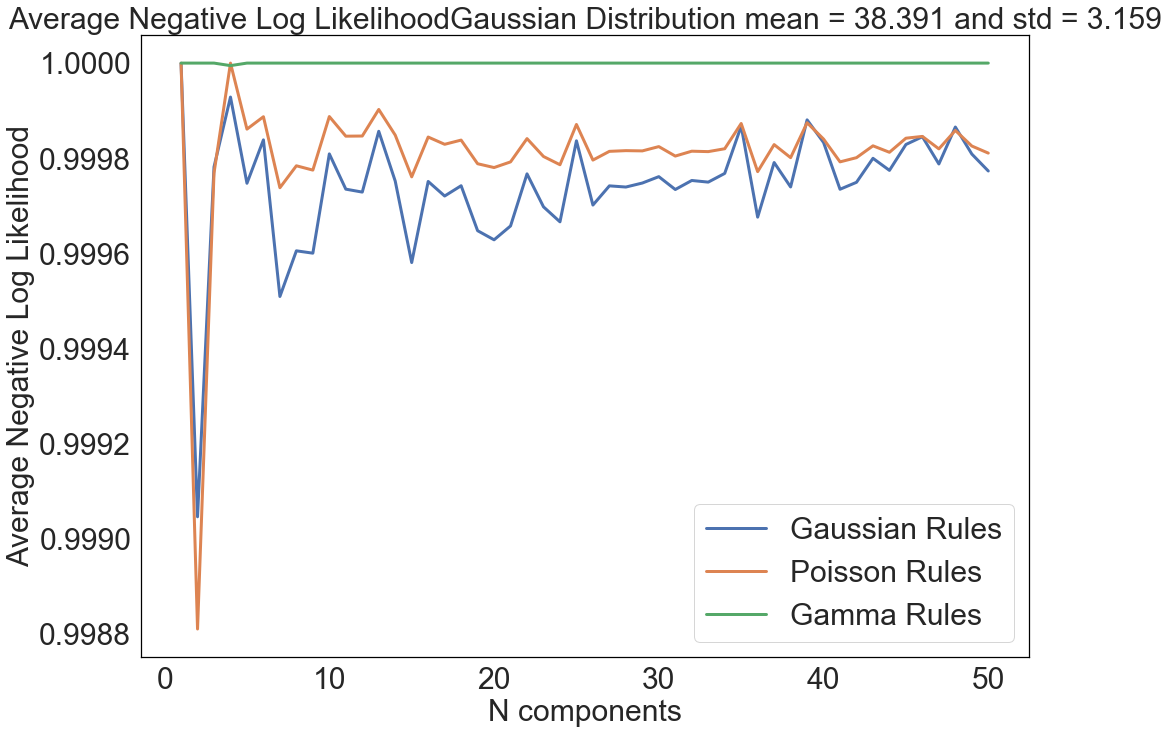

In [433]:
# Plot Negative Log Likelihood
plot_error_graphs('Average Negative Log Likelihood',  [anl_gauss, anl_pois, anl_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'AvgLogLikelihoodGaussianPoisGamma')

In [434]:
V = normal_positive_data_add_min(rows = 200 , columns = 50, mean=15, std= 3*math.pi)
mab_gauss = np.zeros(50)
mab_pois = np.zeros(50)
mab_gamma = np.zeros(50)
msq_gauss = np.zeros(50)
msq_pois = np.zeros(50)
msq_gamma = np.zeros(50)
anl_gauss = np.zeros(50)
anl_pois = np.zeros(50)
anl_gamma = np.zeros(50)


for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
        
    #My Gaussian
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gaussian', phi_update=True)
    Wgauss, Hgauss = nmfM.fit_transform(V)
    V_gauss_app = Wgauss.dot(Hgauss)
    
    #My Poisson
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='poisson', phi_update=True)
    Wpois, Hpois = nmfM.fit_transform(V)
    V_pois_app = Wpois.dot(Hpois)
    
    #My Gamma
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gamma', phi_update=True)
    Wgamma, Hgamma = nmfM.fit_transform(V)
    V_gamma_app = Wgamma.dot(Hgamma)

 
    
    # Mean Absolute Value
    mab_gauss[n-1] = mean_absolute_error(V,V_gauss_app)
    mab_pois[n-1] = mean_absolute_error(V,V_pois_app)
    mab_gamma[n-1] = mean_absolute_error(V,V_gamma_app)


    
    # Mean Squared Errors 
    msq_gauss[n-1] = mean_squared_error(V,V_gauss_app)
    msq_pois[n-1] = mean_squared_error(V,V_pois_app)
    msq_gamma[n-1] = mean_squared_error(V,V_gamma_app)



    # Average Neg Log Likelihoods
  
    diffM = neg_log_likelihood_normal(V, Wgauss, Hgauss)
    anl_gauss[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffM2 =neg_log_likelihood_normal(V, Wpois, Hpois )
    anl_pois[n-1] = diffM2 / (V.shape[0] * V.shape[1])

    diffM3 =neg_log_likelihood_normal(V, Wgamma, Hgamma )
    anl_gamma[n-1] = diffM3 / (V.shape[0] * V.shape[1])





1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


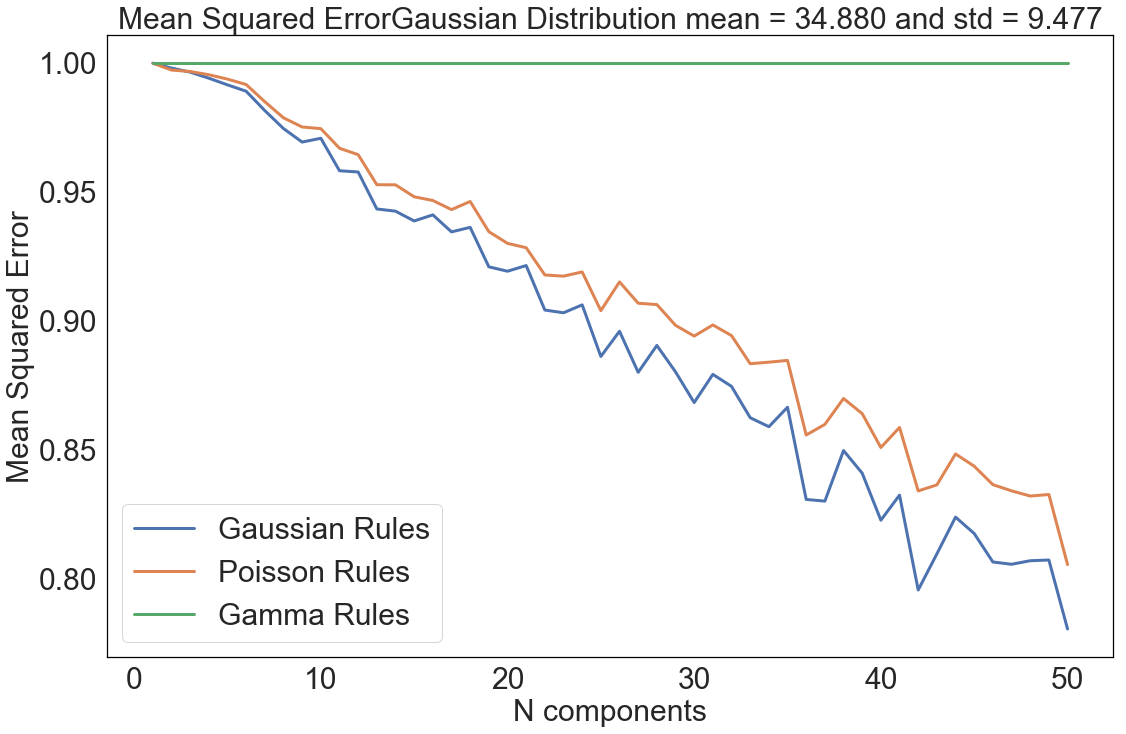

In [435]:
# Plot Mean Square Errors
plot_error_graphs('Mean Squared Error',  [msq_gauss,msq_pois, msq_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'MeanSquareErrorsGaussianPoisGamma')

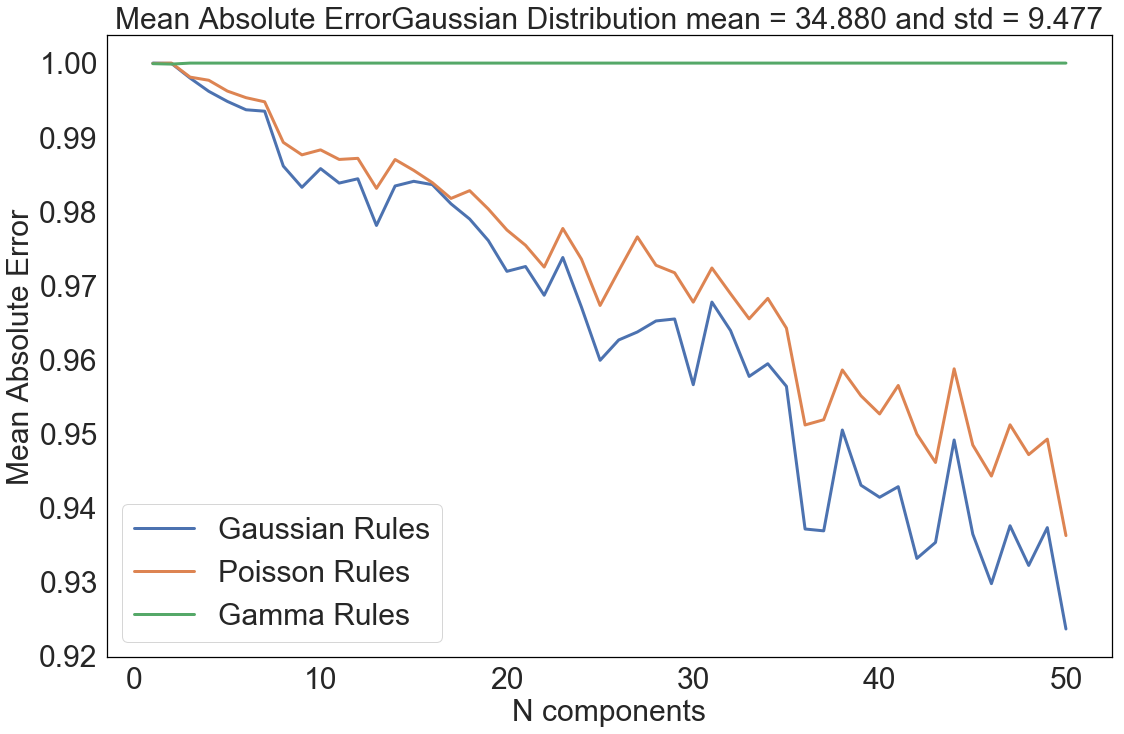

In [436]:
# Plot Mean Absolute Errors
plot_error_graphs('Mean Absolute Error',  [mab_gauss,mab_pois, mab_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'MeanAbsoluteErrorsGaussianPoisGamma')

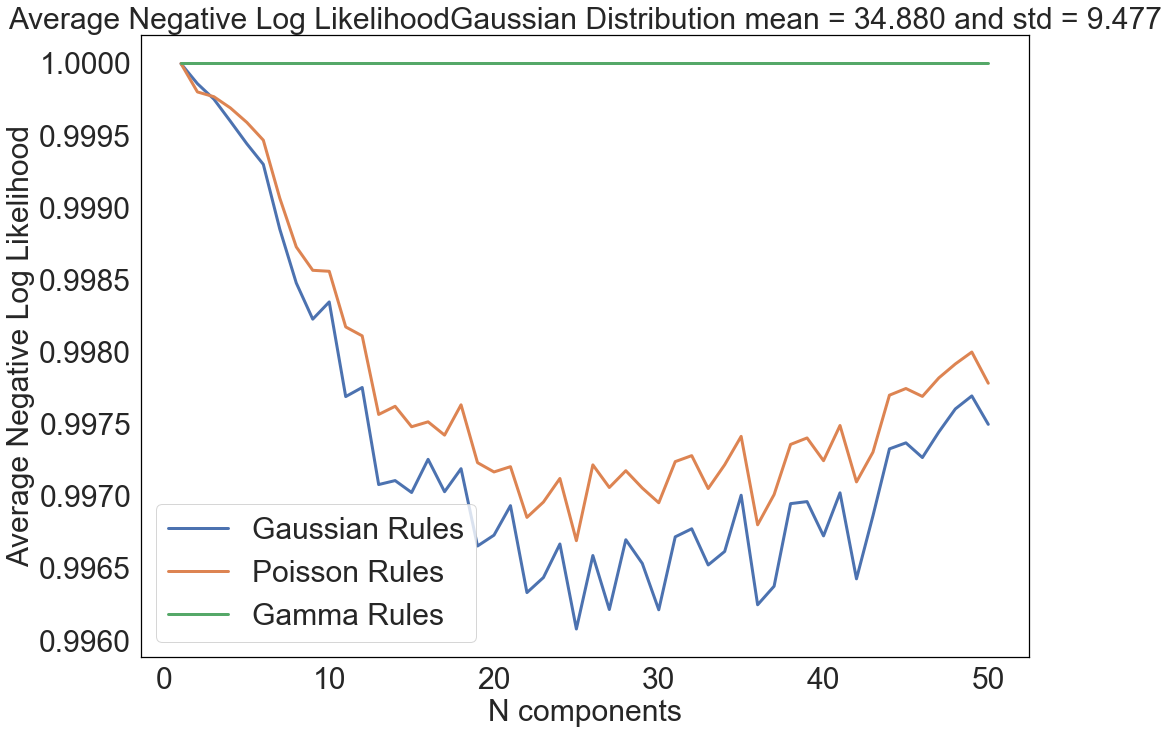

In [437]:
# Plot Negative Log Likelihood
plot_error_graphs('Average Negative Log Likelihood',  [anl_gauss, anl_pois, anl_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'AvgLogLikelihoodGaussianPoisGamma')

In [438]:
V = normal_positive_data_add_min(rows = 200 , columns = 50, mean=15, std= 4*math.pi)
mab_gauss = np.zeros(50)
mab_pois = np.zeros(50)
mab_gamma = np.zeros(50)
msq_gauss = np.zeros(50)
msq_pois = np.zeros(50)
msq_gamma = np.zeros(50)
anl_gauss = np.zeros(50)
anl_pois = np.zeros(50)
anl_gamma = np.zeros(50)


for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
        
    #My Gaussian
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gaussian', phi_update=True)
    Wgauss, Hgauss = nmfM.fit_transform(V)
    V_gauss_app = Wgauss.dot(Hgauss)
    
    #My Poisson
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='poisson', phi_update=True)
    Wpois, Hpois = nmfM.fit_transform(V)
    V_pois_app = Wpois.dot(Hpois)
    
    #My Gamma
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gamma', phi_update=True)
    Wgamma, Hgamma = nmfM.fit_transform(V)
    V_gamma_app = Wgamma.dot(Hgamma)

 
    
    # Mean Absolute Value
    mab_gauss[n-1] = mean_absolute_error(V,V_gauss_app)
    mab_pois[n-1] = mean_absolute_error(V,V_pois_app)
    mab_gamma[n-1] = mean_absolute_error(V,V_gamma_app)


    
    # Mean Squared Errors 
    msq_gauss[n-1] = mean_squared_error(V,V_gauss_app)
    msq_pois[n-1] = mean_squared_error(V,V_pois_app)
    msq_gamma[n-1] = mean_squared_error(V,V_gamma_app)



    # Average Neg Log Likelihoods
  
    diffM = neg_log_likelihood_normal(V, Wgauss, Hgauss)
    anl_gauss[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffM2 =neg_log_likelihood_normal(V, Wpois, Hpois )
    anl_pois[n-1] = diffM2 / (V.shape[0] * V.shape[1])

    diffM3 =neg_log_likelihood_normal(V, Wgamma, Hgamma )
    anl_gamma[n-1] = diffM3 / (V.shape[0] * V.shape[1])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


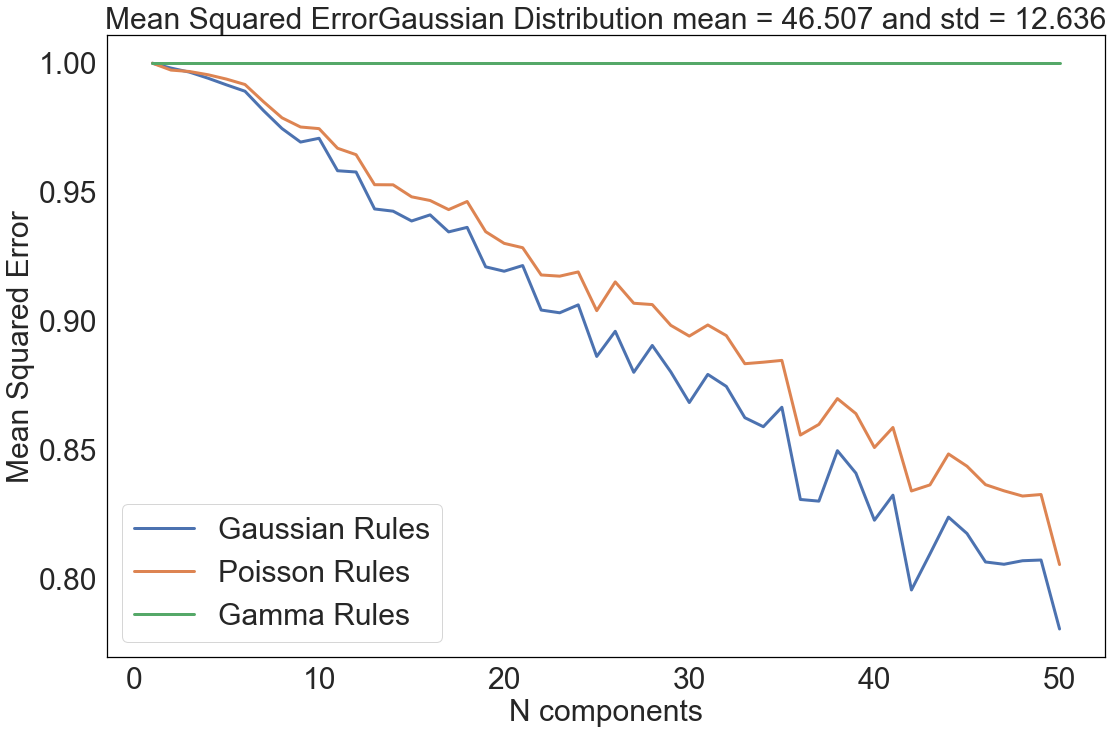

In [439]:
# Plot Mean Square Errors
plot_error_graphs('Mean Squared Error',  [msq_gauss,msq_pois, msq_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'MeanSquareErrorsGaussianPoisGamma')

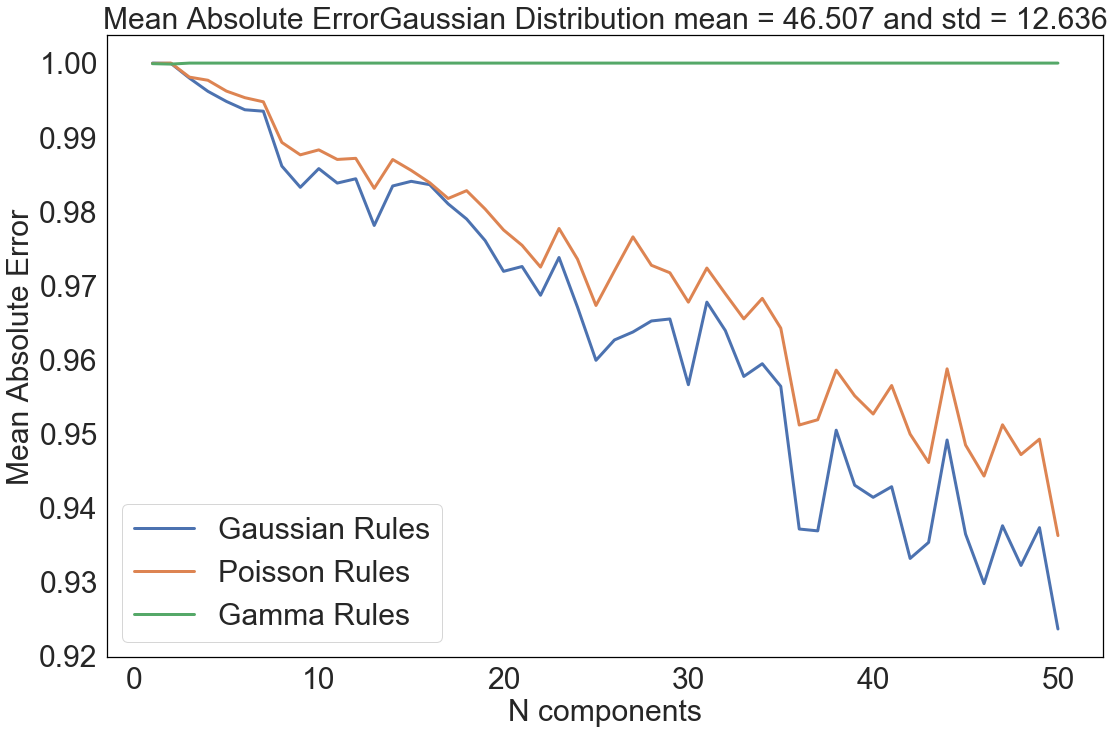

In [440]:
# Plot Mean Absolute Errors
plot_error_graphs('Mean Absolute Error',  [mab_gauss,mab_pois, mab_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'MeanAbsoluteErrorsGaussianPoisGamma')

AttributeError: Unknown property base

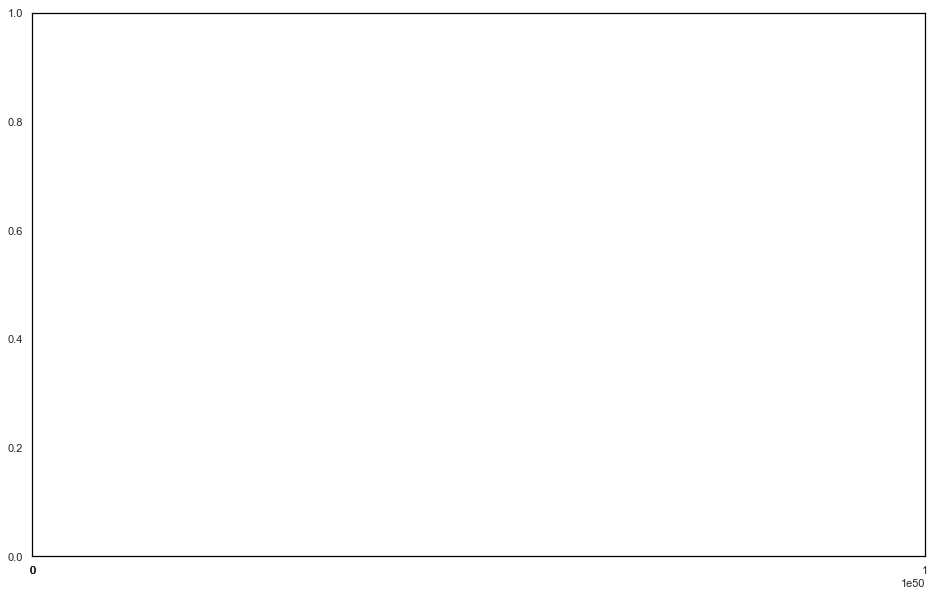

In [447]:
# Plot Negative Log Likelihood
plot_error_graphs('Avg Negative LogLikelihood ',  [anl_gauss, anl_pois, anl_gamma],['Gaussian Rules','Poisson Rules', 'Gamma Rules'],V.mean(),V.std(),'AvgLogLikelihoodGaussianPoisGamma')

#### Distribution compared to Sklearn with 10 components

In [ ]:
rs = RandomState(76321654)
n = 10
nmfS = nmfsk(n_components=n,random_state=rs)
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_
sns.set(color_codes=True)
sns.distplot(V[4], label ='V')
sns.distplot(Ws.dot(Hs)[4], label='Sklearn')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(Ws.dot(Hs).mean()) + ' std: ' + str(Ws.dot(Hs).std()) )

#### Distribution compared to Mine with 10 components

Original Data mean: 46.50707220283565 std: 12.63550362972908
Tansformation Data : 46.53234152754583 std: 7.335748537428213


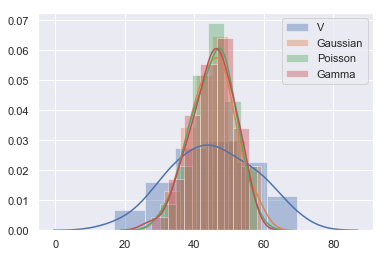

In [175]:
V = normal_positive_data_add_min(rows = 200 , columns = 50, mean=15, std= 4*math.pi)

rs = RandomState(76321654)
n = 10
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs)
W, H = nmfM.fit_transform(V)
sns.set(color_codes=True)
sns.distplot(V[4], label = 'V')
sns.distplot(W.dot(H)[4], label ='Gaussian')
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs,distribution='poisson')
W, H = nmfM.fit_transform(V)
sns.set(color_codes=True)
sns.distplot(W.dot(H)[4], label ='Poisson')
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs,distribution='gamma')
W, H = nmfM.fit_transform(V)
sns.set(color_codes=True)
sns.distplot(W.dot(H)[4], label ='Gamma')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

#### Distribution compared to Combination with 10 components

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Original Data mean: 11.626768050708913 std: 3.15887590743227
Tansformation Data : 11.628061712060816 std: 1.6337965124618066


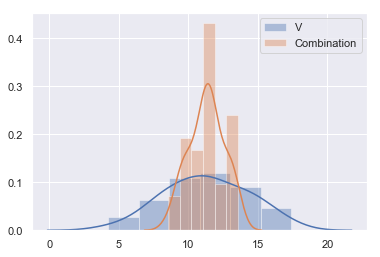

In [59]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs)
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_
sns.set(color_codes=True)
sns.distplot(V[4],label='V')
sns.distplot(W2.dot(H2)[4], label = 'Combination')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W2.dot(H2).mean()) + ' std: ' + str(W2.dot(H2).std()) )

In [177]:
max_iterations = np.arange(1,151)
V = normal_positive_data_add_min(rows = 2000 , columns = 100, mean=10, std=2*math.pi )


anl_gauss = np.zeros(150)
anl_pois = np.zeros(150)
anl_gamma = np.zeros(150)



n = 10
for max_it in max_iterations:
    print(max_it)
    rs = RandomState(76321654)
    
   
    
    #My Gaussian
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gaussian',max_iterations=max_it)
    Wgauss, Hgauss = nmfM.fit_transform(V)
    V_gauss_app = Wgauss.dot(Hgauss)
    
    #My Poisson
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='poisson',max_iterations=max_it)
    Wpois, Hpois = nmfM.fit_transform(V)
    V_pois_app = Wpois.dot(Hpois)
    
    #My Gamma
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, distribution='gamma', phi_update=True,max_iterations=max_it)
    Wgamma, Hgamma = nmfM.fit_transform(V)
    V_gamma_app = Wgamma.dot(Hgamma)
    
   
  
    # Average Neg Log Likelihoods
    
    diffM = neg_log_likelihood_normal(V, Wgauss, Hgauss)
    anl_gauss[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffM = neg_log_likelihood_normal(V, Wpois, Hpois)
    anl_pois[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffM = neg_log_likelihood_normal(V, Wgamma, Hgamma)
    anl_gamma[max_it-1] = diffM / (V.shape[0] * V.shape[1])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


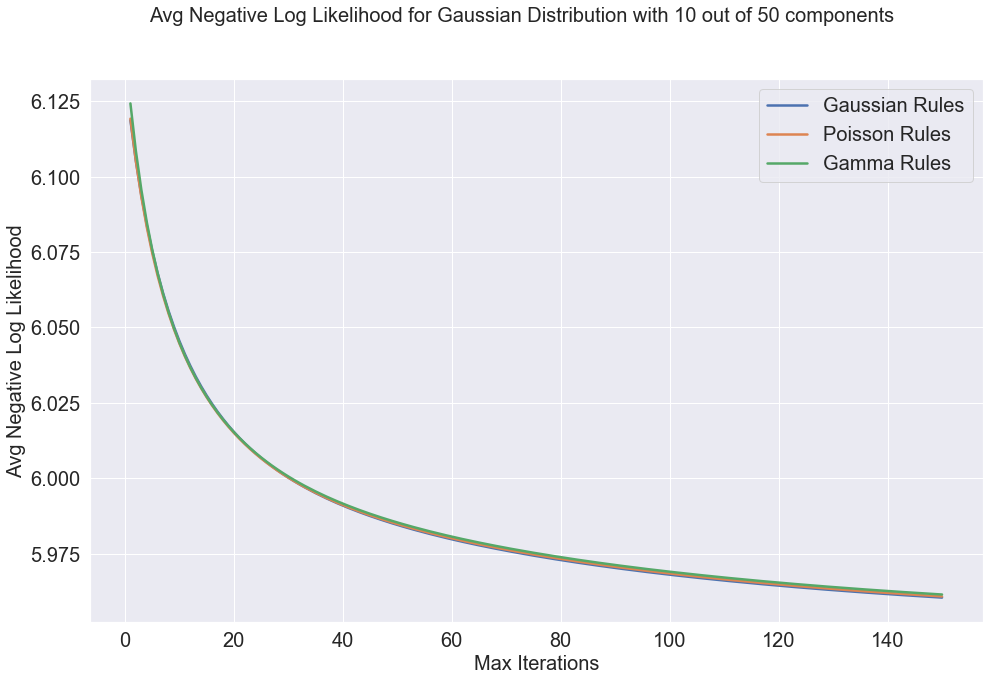

In [178]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  anl_gauss, label="Gaussian Rules", linewidth=2.5)
ax_1.plot(max_iterations, 
                  anl_pois, label="Poisson Rules", linewidth=2.5)
ax_1.plot(max_iterations, 
                  anl_gamma, label="Gamma Rules", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Gaussian Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('GaussianGraphsDiss/+200rows50columnsNcomponents=10MFGaussianIterations' + str("%.3f" % round(V.mean(),3)) + '  Original Std = ' + str("%.3f" % round(V.std(),3)) + '.pdf')

### Check if Bregman Divergences Decreases

In [ ]:
def bregman_div(V,W,H):
    
    A = W.dot(H) 
    
   
    

    breg = ((V-A)** 2) / 2
    
    #breg[np.where(np.isnan(breg))] = np.nanmax(breg)
    
    total = np.sum(breg)
    
    return total

In [ ]:
max_iterations = np.arange(1,101)

bregMy = np.zeros(100)
bregSK = np.zeros(100)
bregComb = np.zeros(100)


n = 10
for max_it in max_iterations:
    
    rs = RandomState(76321654)
    
   
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, max_iterations = max_it, distribution = 'gaussian', phi_update = True)
    W, H = nmfM.fit_transform(V)
    
    #My Comb
    rs = RandomState(76321654)
    nmfM = nmfmy2(n_components=n,random_state=rs, max_iter = max_it, distribution = 'gaussian')
    W2 = nmfM.fit_transform(V)
    H2 = nmfM.components_
    
    # Sklearn
    rs = RandomState(76321654)
    nmfS = nmfsk(n_components=n,random_state=rs, max_iter = max_it)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Bregman Divergence Error Comb
    
    bregComb[max_it-1] = bregman_div(V, W2, H2)
    
    # Bregman Divergence Error My
    
    bregMy[max_it-1] = bregman_div(V, W, H)
    
     # Bregman Divergence Error Sklearn
    
    bregSK[max_it-1] = bregman_div(V, Ws, Hs)

In [ ]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  bregMy, label="Our Implementation", linewidth=2.5)



for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Bregman Divergences')
fig_1.suptitle('Bregman Divergences for Gaussian Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('GaussianGraphs/NMFGaussianBregman.pdf')